# FMT - Project

## Domain:
Semiconductor manufacturing process

## Conetxt:
A dataplex modern semiconductor manufacturing process is normally under constant surveillance via the monitoring of signals/
variables collected from sensors and or process measurement points. However, not all of these signals are equally valuable in a specific monitoring system. The measured signals contain a databination of useful information, irrelevant information as well as noise. Engineers typically have a much larger number of signals than are actually required. If we consider each type of signal as a feature, then feature selection may be applied to identify the most relevant signals. The Process Engineers may then use these signals to determine key factors contributing to yield excursions downstream in the process. This will enable an increase in process throughput, decreased time to learning and reduce the per unit production costs. These signals can be used as features to predict the yield type. And by analysing and trying out different databinations of features, essential signals that are impacting the yield type can be identified.

## Data Description:
The data consists of 1567 examples each with 591 features.
The dataset presented in this case represents a selection of such features where each example represents a single production entity with associated measured features and the labels represent a simple pass/fail yield for in house line testing. Target column “ –1” corresponds to a pass and “1” corresponds to a fail and the data time stamp is for that specific test point.

## Project Objective:
We will build a classifier to predict the Pass/Fail yield of a particular process entity and analyse whether all the
features are required to build the model or not.

In [1]:
#loading required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import binarize
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold,cross_val_score,KFold
from imblearn.over_sampling import SMOTE,ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn import metrics
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_columns',None)
pd.set_option('max_rows',None)

### EDA and Data Pre-processing

In [2]:
data = pd.read_csv('Signal-data.csv')

# getting the shape of the data
# we have 1,567 rows and 592 columns
print(data.shape)

(1567, 592)


In [3]:
sg=data.iloc[0:1548,:]
row,column=sg.shape
print('The past dataset contains', row, 'rows and', column, 'columns')

The past dataset contains 1548 rows and 592 columns


In [4]:
val=data.iloc[1548:1567,:]
row,column=val.shape
print('The validation dataset contains', row, 'rows and', column, 'columns')

The validation dataset contains 19 rows and 592 columns


In [5]:
data = data.drop(['Time'], axis=1)

In [6]:
#counting the number of missing values in each column
data.isnull().sum()

0              24
1              25
2              32
3              32
4              32
5              32
6              32
7              27
8              20
9              20
10             20
11             20
12             20
13             21
14             21
15             21
16             21
17             21
18             21
19             28
20             18
21             20
22             20
23             20
24             20
25             20
26             20
27             20
28             20
29             20
30             20
31             20
32             19
33             19
34             19
35             19
36             19
37             19
38             19
39             19
40             42
41             42
42             19
43             19
44             19
45             19
46             19
47             19
48             19
49             19
50             19
51             19
52             19
53             22
54             22
55        

In [7]:
#5-point summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
0,1543.0,3014.617025,73.850987,2743.2400,2966.325000,3011.49000,3057.045000,3356.3500
1,1542.0,2495.495383,80.469311,2158.7500,2452.112500,2498.97500,2538.550000,2846.4400
2,1535.0,2200.287873,29.436192,2060.6600,2180.888900,2200.98890,2217.866700,2315.2667
3,1535.0,1398.678866,442.942283,0.0000,1084.377900,1285.21440,1592.172750,3715.0417
4,1535.0,4.232053,56.684272,0.6815,1.017700,1.31680,1.529100,1114.5366
5,1535.0,100.000000,0.000000,100.0000,100.000000,100.00000,100.000000,100.0000
6,1535.0,101.091224,6.260266,82.1311,97.880000,101.51220,104.530000,129.2522
7,1540.0,0.121819,0.009010,0.0000,0.121100,0.12240,0.123800,0.1286
8,1547.0,1.462330,0.074042,1.1910,1.410700,1.46110,1.516600,1.6564
9,1547.0,-0.000892,0.015087,-0.0534,-0.010800,-0.00130,0.008250,0.0749


In [8]:
#dropping the columns the have constant signal
cols = data.select_dtypes([np.number]).columns
std = data[cols].std()
cols_to_drop = std[std==0].index
data.drop(cols_to_drop, axis=1,inplace=True)
data.head()

,0,1,2,3,4,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,43,44,45,46,47,48,50,51,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,142,143,144,145,146,147,148,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,180,181,182,183,184,185,187,188,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,227,228,238,239,244,245,246,247,248,249,250,251,252,253,254,255,267,268,269,270,271,272,273,274,275,277,278,279,280,281,282,283,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,316,317,318,319,320,321,323,324,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,365,366,367,368,376,377,382,383,384,385,386,387,388,389,390,391,392,393,405,406,407,408,409,410,411,412,413,415,416,417,418,419,420,421,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,452,453,454,455,456,457,459,460,467,468,469,470,471,472,473,474,475,476,477,478,479,480,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,499,500,510,511,516,517,518,519,520,521,522,523,524,525,526,527,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
0,3040.34,2501.16,2207.3889,962.5317,1.2043,104.0311,0.1210,1.5481,-0.0367,0.0014,0.9634,196.2746,8.4061,409.1399,9.8470,0.9701,186.4275,12.5222,1.4208,-5575.25,2755.5,-4149.25,-1533.50,1.3330,1.9803,7.4065,66.2000,2.9556,0.2366,3.3769,85.3498,8.6397,50.6324,64.1999,49.3676,65.3490,86.7217,117.6740,4.138,0.2003,361.8609,9.9501,143.0718,749.7516,1.2123,141.7482,646.6809,257.9247,4.632,4.908,2845.0,0.9231,0.9438,4.5554,0.4836,361.5118,10.2084,123.5555,11.7073,19.5164,26.2174,723.5343,0.9488,149.9064,634.9736,111.8165,166.6571,468.3165,0.0,0.0204,-0.0132,0.0251,0.0022,-0.0156,-0.0011,-0.0344,-0.0095,6.8241,0.1284,NaN,2.4320,0.9680,1773.5327,0.2140,9242.0100,-0.0142,0.0011,-0.0002,0.0001,0.0002,-0.1808,0.1452,0.0372,0.0003,0.0001,0.0373,-0.0052,-0.0005,-0.0011,0.0002,0.1023,0.0718,NaN,NaN,NaN,NaN,0.9397,0.0,790.0665,0.9904,59.4838,0.6005,0.9672,6.3060,15.87,3.150,15.87,15.84,1.045,2.582,0.5323,3.555,-0.4258,0.7785,0.9997,2.3122,1006.4594,38.0592,92.0,63.7,28.9,74.7,416.4299,0.3067,6.11,0.0053,0.0850,0.0518,0.0612,0.0212,13.7967,5.292,19.587,0.4062,0.0142,13.4348,0.45,0.0776,NaN,NaN,1036.0,644.0,3818.0,5475.0,0.109,0.066,0.065,2.6,1.2,0.147,0.325,0.8505,0.1437,0.3962,0.6196,0.3962,0.9807,0.1998,0.196,22.15,0.426,9.67,20.564,0.1215,4.14,16.88,52.720,0.270,5.30,20.21,0.440,8.92,17.69,5.30,6.797,21.532,0.1299,5.95,0.0,17.69,82.523,0.0,0.0622,0.0479,0.0772,0.1055,0.0474,0.0886,0.0494,0.0384,5.9548,0.0018,NaN,0.0945,0.0097,200.1670,0.0523,765.2998,0.0196,0.0158,0.0053,0.0052,NaN,NaN,NaN,NaN,0.0179,0.0,74.1862,0.0013,2.7930,0.0273,0.0173,0.3696,0.0322,36.442,2.3222,27.5221,24.8245,9.3474,29.3685,124.707,0.0892,2.0954,0.0014,0.0242,0.0151,0.0162,0.0069,4.1478,1.8374,5.7352,0.1433,0.0047,4.0538,0.1246,0.0251,NaN,NaN,441.7317,279.3486,1740.3043,2552.7019,0.0467,0.0307,0.0296,0.9083,0.4475,0.0445,0.1218,0.3077,0.0618,0.1634,0.2386,0.1634,0.3554,0.0891,0.0803,6.8608,0.1351,2.8320,6.9173,0.0356,1.4088,5.9203,13.5137,0.0914,1.7522,6.7673,0.1316,2.6660,9.5519,1.7522,1.8354,7.8185,0.0420,1.8126,0.0,6.1389,23.8837,5.4768,3.2206,0.0,0.0185,0.0225,0.0339,0.0481,0.0116,0.0492,0.0260,0.0210,2.0058,0.0006,NaN,0.0279,0.0027,61.6056,0.0183,267.8151,0.0061,0.0040,0.0043,0.0035,0.0020,0

In [9]:
#attribute type( except the target all the variables are float)
data.dtypes

0            float64
1            float64
2            float64
3            float64
4            float64
6            float64
7            float64
8            float64
9            float64
10           float64
11           float64
12           float64
14           float64
15           float64
16           float64
17           float64
18           float64
19           float64
20           float64
21           float64
22           float64
23           float64
24           float64
25           float64
26           float64
27           float64
28           float64
29           float64
30           float64
31           float64
32           float64
33           float64
34           float64
35           float64
36           float64
37           float64
38           float64
39           float64
40           float64
41           float64
43           float64
44           float64
45           float64
46           float64
47           float64
48           float64
50           float64
51           

In [10]:
#after dropping the constant signal
row,column=data.shape
print('After dropping the constant signals the dataset contains', row, 'rows and', column, 'columns')

After dropping the constant signals the dataset contains 1567 rows and 475 columns


In [11]:
#checking for distribution of the target class shows that the data set is highly imbalanced
sg['Pass/Fail'].value_counts(normalize=True)

-1.0    0.934641
 1.0    0.065359
Name: Pass/Fail, dtype: float64

In [12]:
#label encoding the target class
data['Pass/Fail']=data['Pass/Fail'].replace([-1,1],[0,1])

In [13]:
# checking how many rows have missing values shows that all rows have atleast one missing value
rows=data.isnull().any(axis = 1).sum()
print( 'All the' ,rows,'rows have atleast one missing value')

All the 1567 rows have atleast one missing value


In [14]:
#replacing the NaN/NA with zero and considering it as no signal
data.fillna(0,inplace=True)

# Data Visualisation

In [15]:
unique_vals = data['Pass/Fail'].unique()  
targets = [data.loc[data['Pass/Fail'] == val] for val in unique_vals]

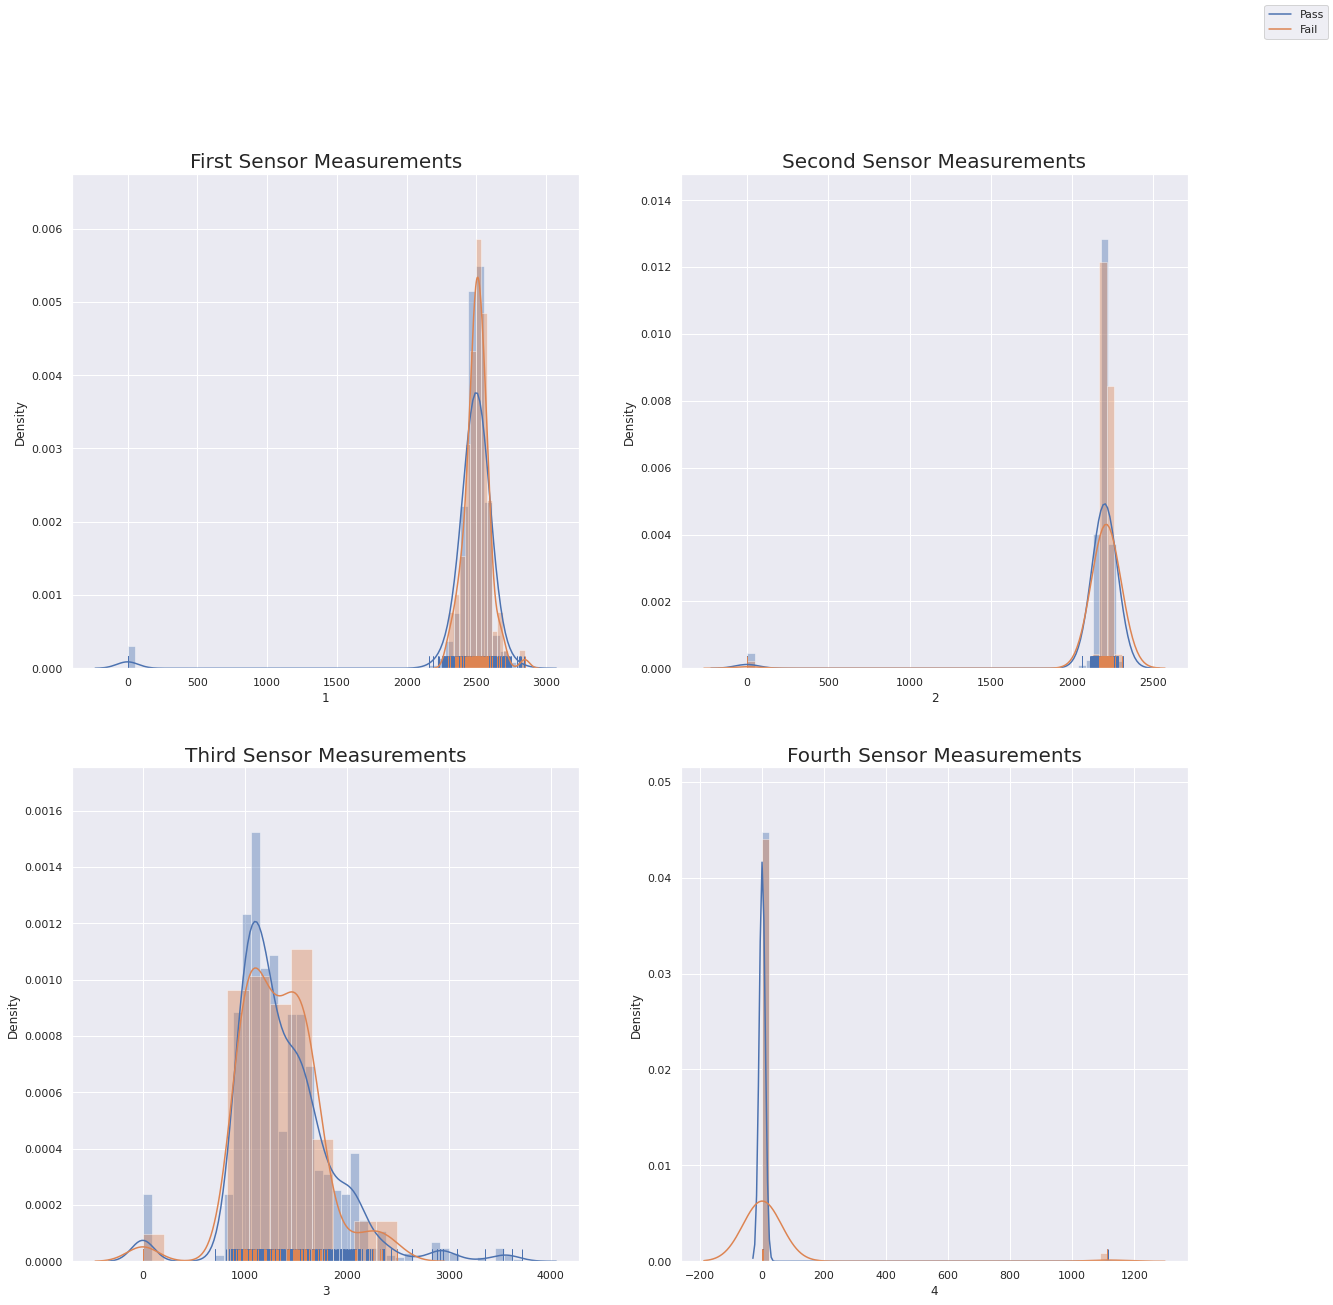

In [16]:
fig = plt.figure(figsize=(20,20))

plt.subplot(2, 2, 1)
for target in targets:
    sns.distplot(target['1'], hist=True, rug=True)
plt.title('First Sensor Measurements', fontsize = 20)

plt.subplot(2, 2, 2)
for target in targets:
    sns.distplot(target['2'], hist=True, rug=True)
plt.title('Second Sensor Measurements', fontsize = 20)

plt.subplot(2, 2, 3)
for target in targets:
    sns.distplot(target['3'], hist=True, rug=True)
plt.title('Third Sensor Measurements', fontsize = 20)

plt.subplot(2, 2, 4)
for target in targets:
    sns.distplot(target['4'], hist=True, rug=True)
plt.title('Fourth Sensor Measurements', fontsize = 20)

#sns.add_legend()
#plt.legend()
fig.legend(labels=['Pass','Fail'])
plt.show()

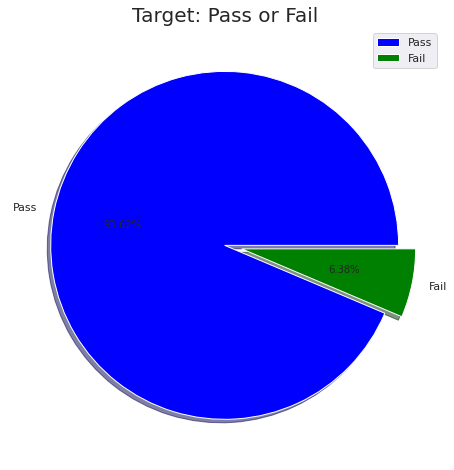

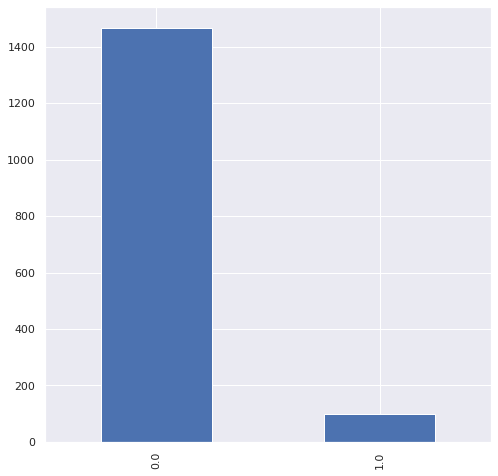

In [17]:
# pie chart
# We have highly imbalanced class with only 6.6% failures and 93.4% pass

labels = ['Pass', 'Fail']
size = data['Pass/Fail'].value_counts()
colors = ['blue', 'green']
explode = [0, 0.1]

plt.style.use('seaborn-deep')
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels =labels, colors = colors, explode = explode, autopct = "%.2f%%", shadow = True)
plt.axis('off')
plt.title('Target: Pass or Fail', fontsize = 20)
plt.legend()
plt.show()
data['Pass/Fail'].value_counts().plot(kind="bar");

Text(0.5, 1.0, 'Correlation heatmap for the Data')

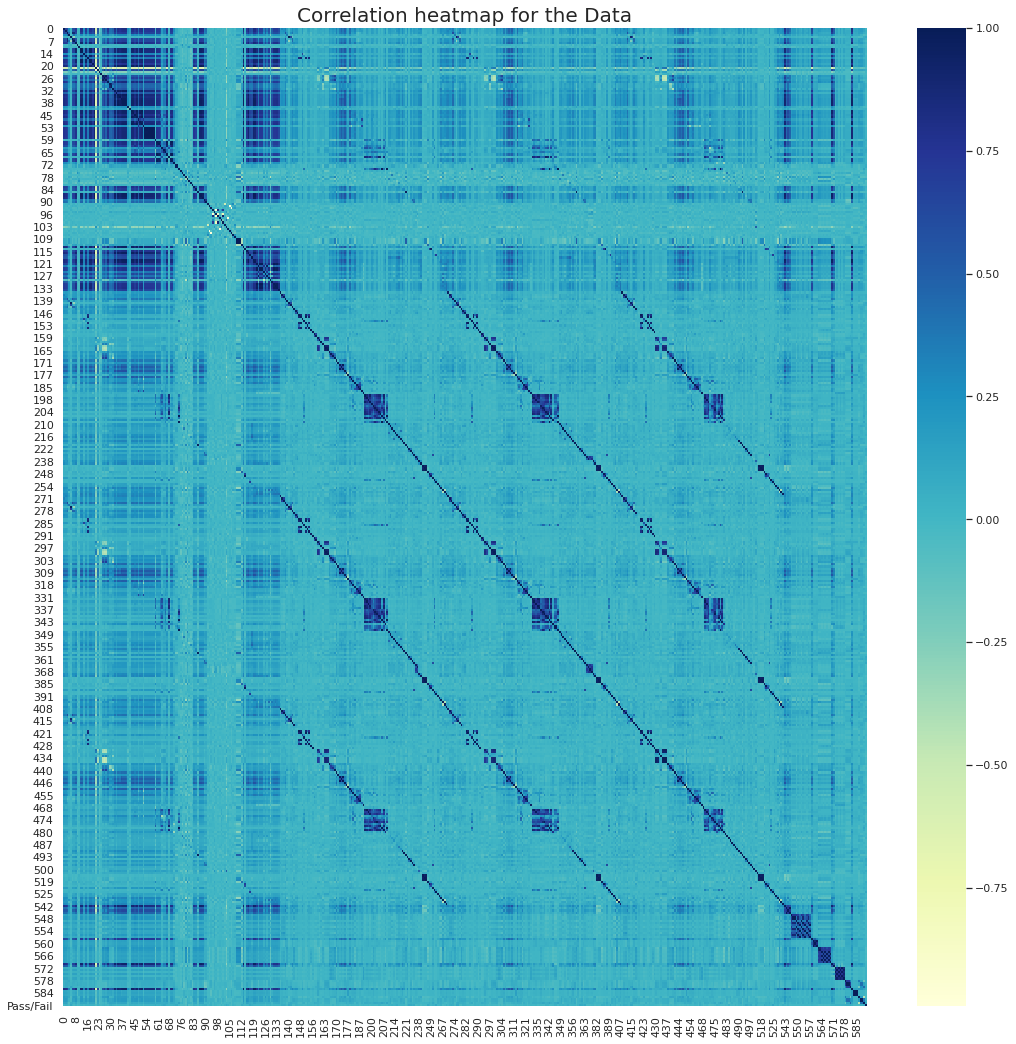

In [18]:
plt.rcParams['figure.figsize'] = (18, 18)
sns.heatmap(data.corr(), cmap = "YlGnBu")
plt.title('Correlation heatmap for the Data', fontsize = 20)

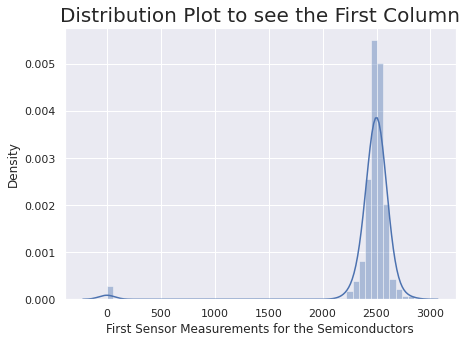

In [19]:
# distribution plot to see the range of value in the second column

plt.rcParams['figure.figsize'] = (7, 5)
sns.distplot(data['1'])
plt.title('Distribution Plot to see the First Column', fontsize = 20)
plt.xlabel('First Sensor Measurements for the Semiconductors')
plt.show()

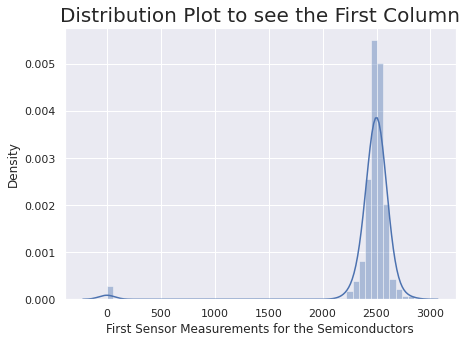

In [20]:
# distribution plot to see the range of value in the second column

plt.rcParams['figure.figsize'] = (7, 5)
sns.distplot(data['1'])
plt.title('Distribution Plot to see the First Column', fontsize = 20)
plt.xlabel('First Sensor Measurements for the Semiconductors')
plt.show()

In [21]:
#making a copy of the dataset and dropping the target class
data1=data.copy()
data1.drop(['Pass/Fail'],axis=1,inplace=True)

In [22]:
# Create correlation matrix
corr_matrix = data1.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.70
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]

# Drop features 
data1.drop(to_drop, axis=1, inplace=True)

In [23]:
row,column=data1.shape
print('After dropping the correlated variables the dataset contains', row, 'rows and', column, 'columns')

After dropping the correlated variables the dataset contains 1567 rows and 160 columns


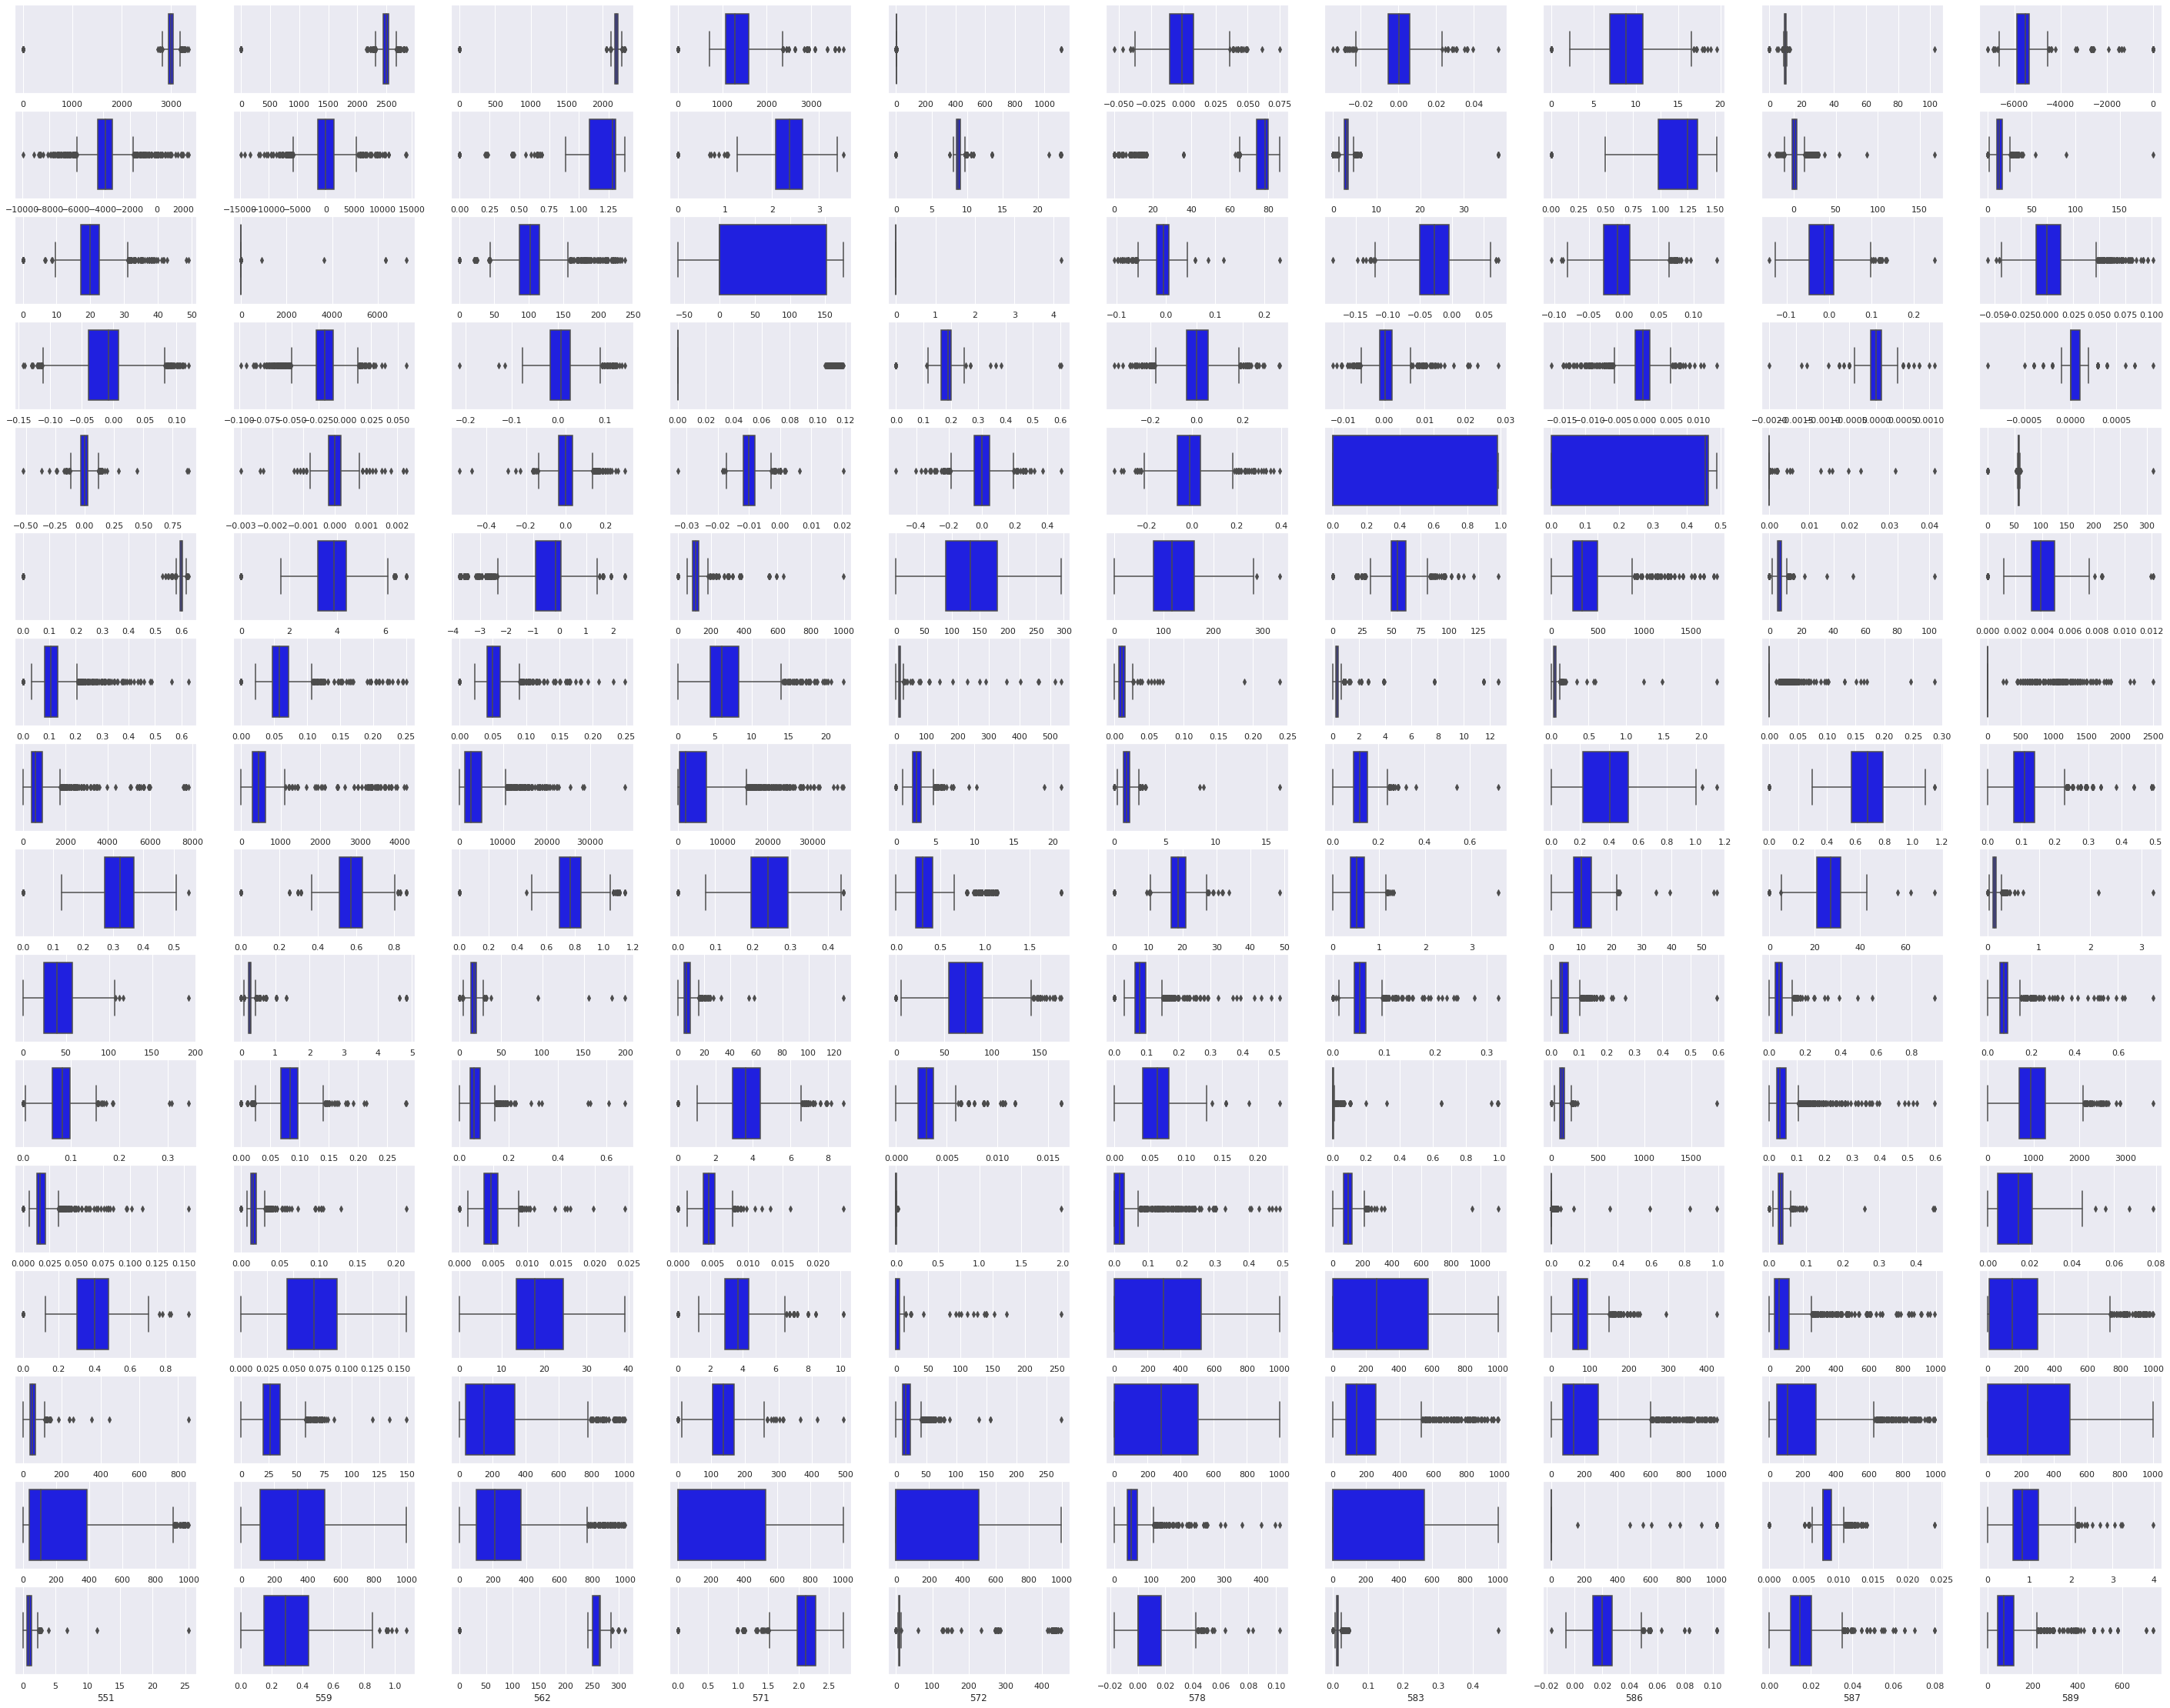

In [24]:
#Boxplot to check for outliers
plt.figure(figsize=(50, 50))
col = 1
for i in data1.columns:
    plt.subplot(20,10, col)
    sns.boxplot(data1[i],color='blue')
    col += 1

Majority of the attributes have outliers, will be replacing them with the median

In [25]:
#find the outliers and replace them by median
for i in data1.columns:
    q1 = data1[i].quantile(0.25)
    q3 = data1[i].quantile(0.75)
    iqr = q3 - q1
    
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    
    data1.loc[(data1[i] < low) | (data1[i] > high), i] = data1[i].median()

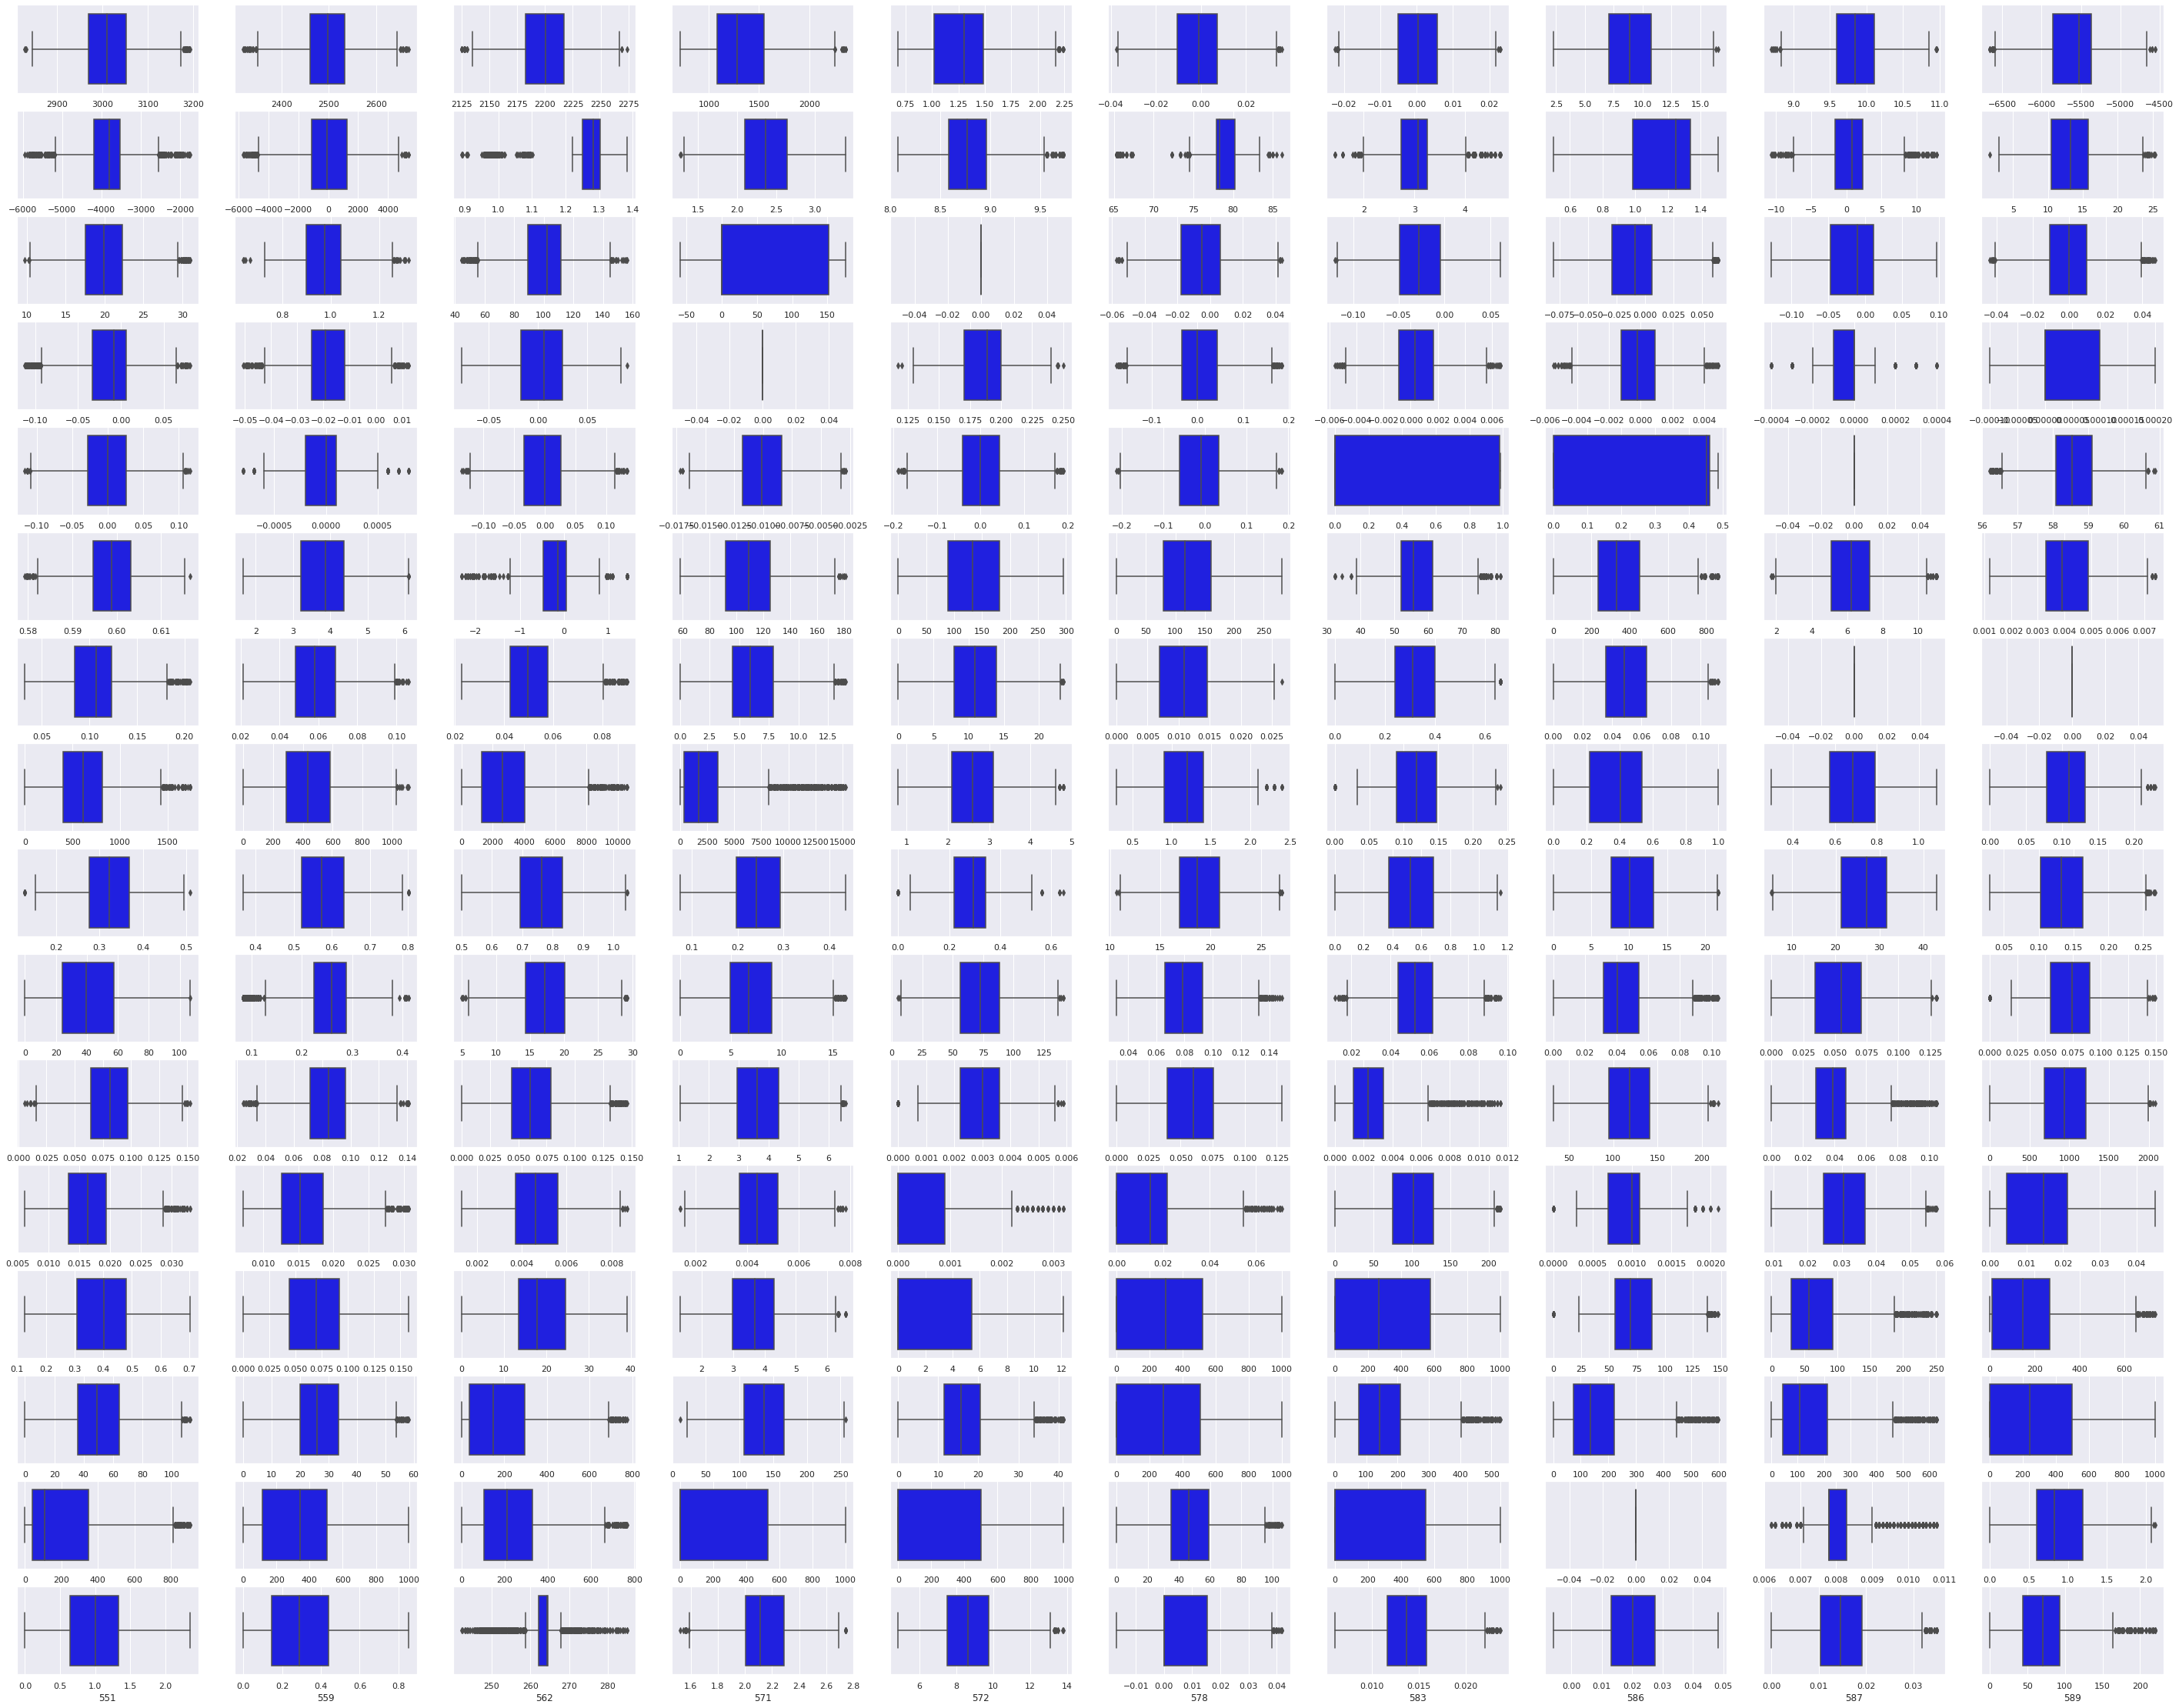

In [26]:
#After treating the outlier values
plt.figure(figsize=(50, 50))
col = 1
for i in data1.columns:
    plt.subplot(20,10, col)
    sns.boxplot(data1[i],color='blue')
    col += 1

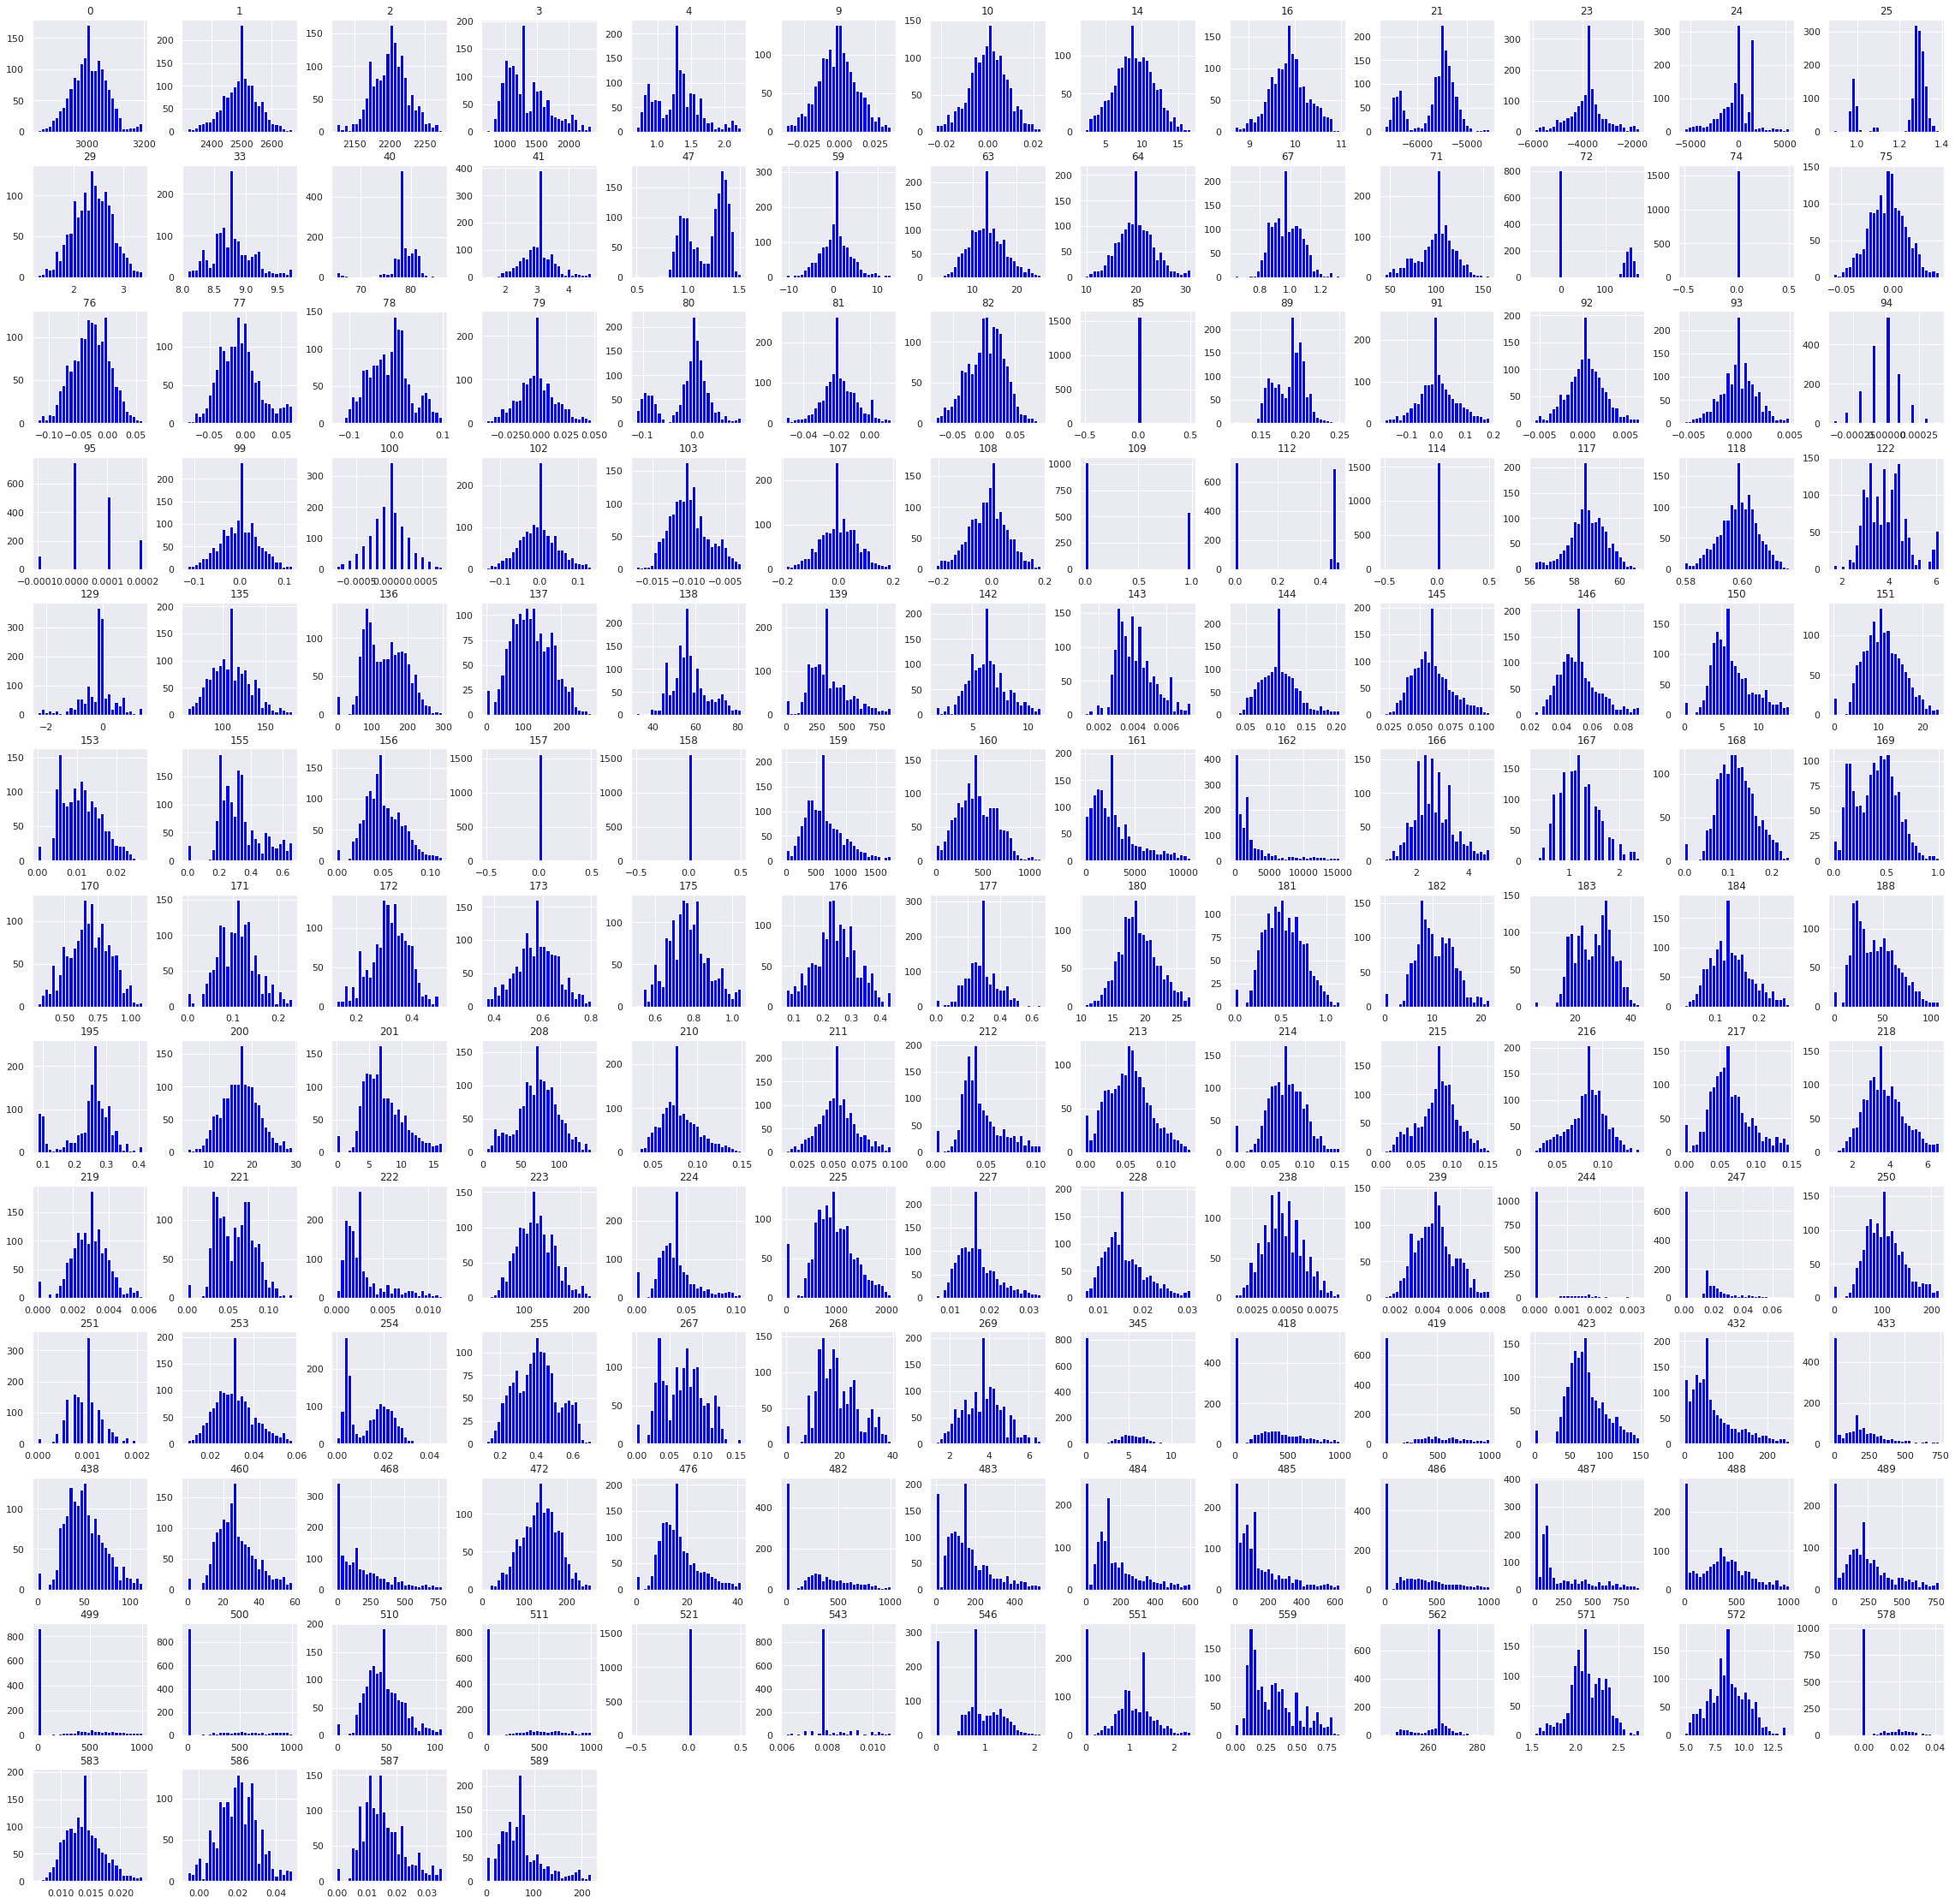

In [27]:
#plotting histogram to check for the frequency of values within a variable
data1.hist(bins = 30, figsize = (40, 40), color = 'blue')
plt.show()

Some variables have still have 0 as a constant signal, will be drooping them after scaling with z-score

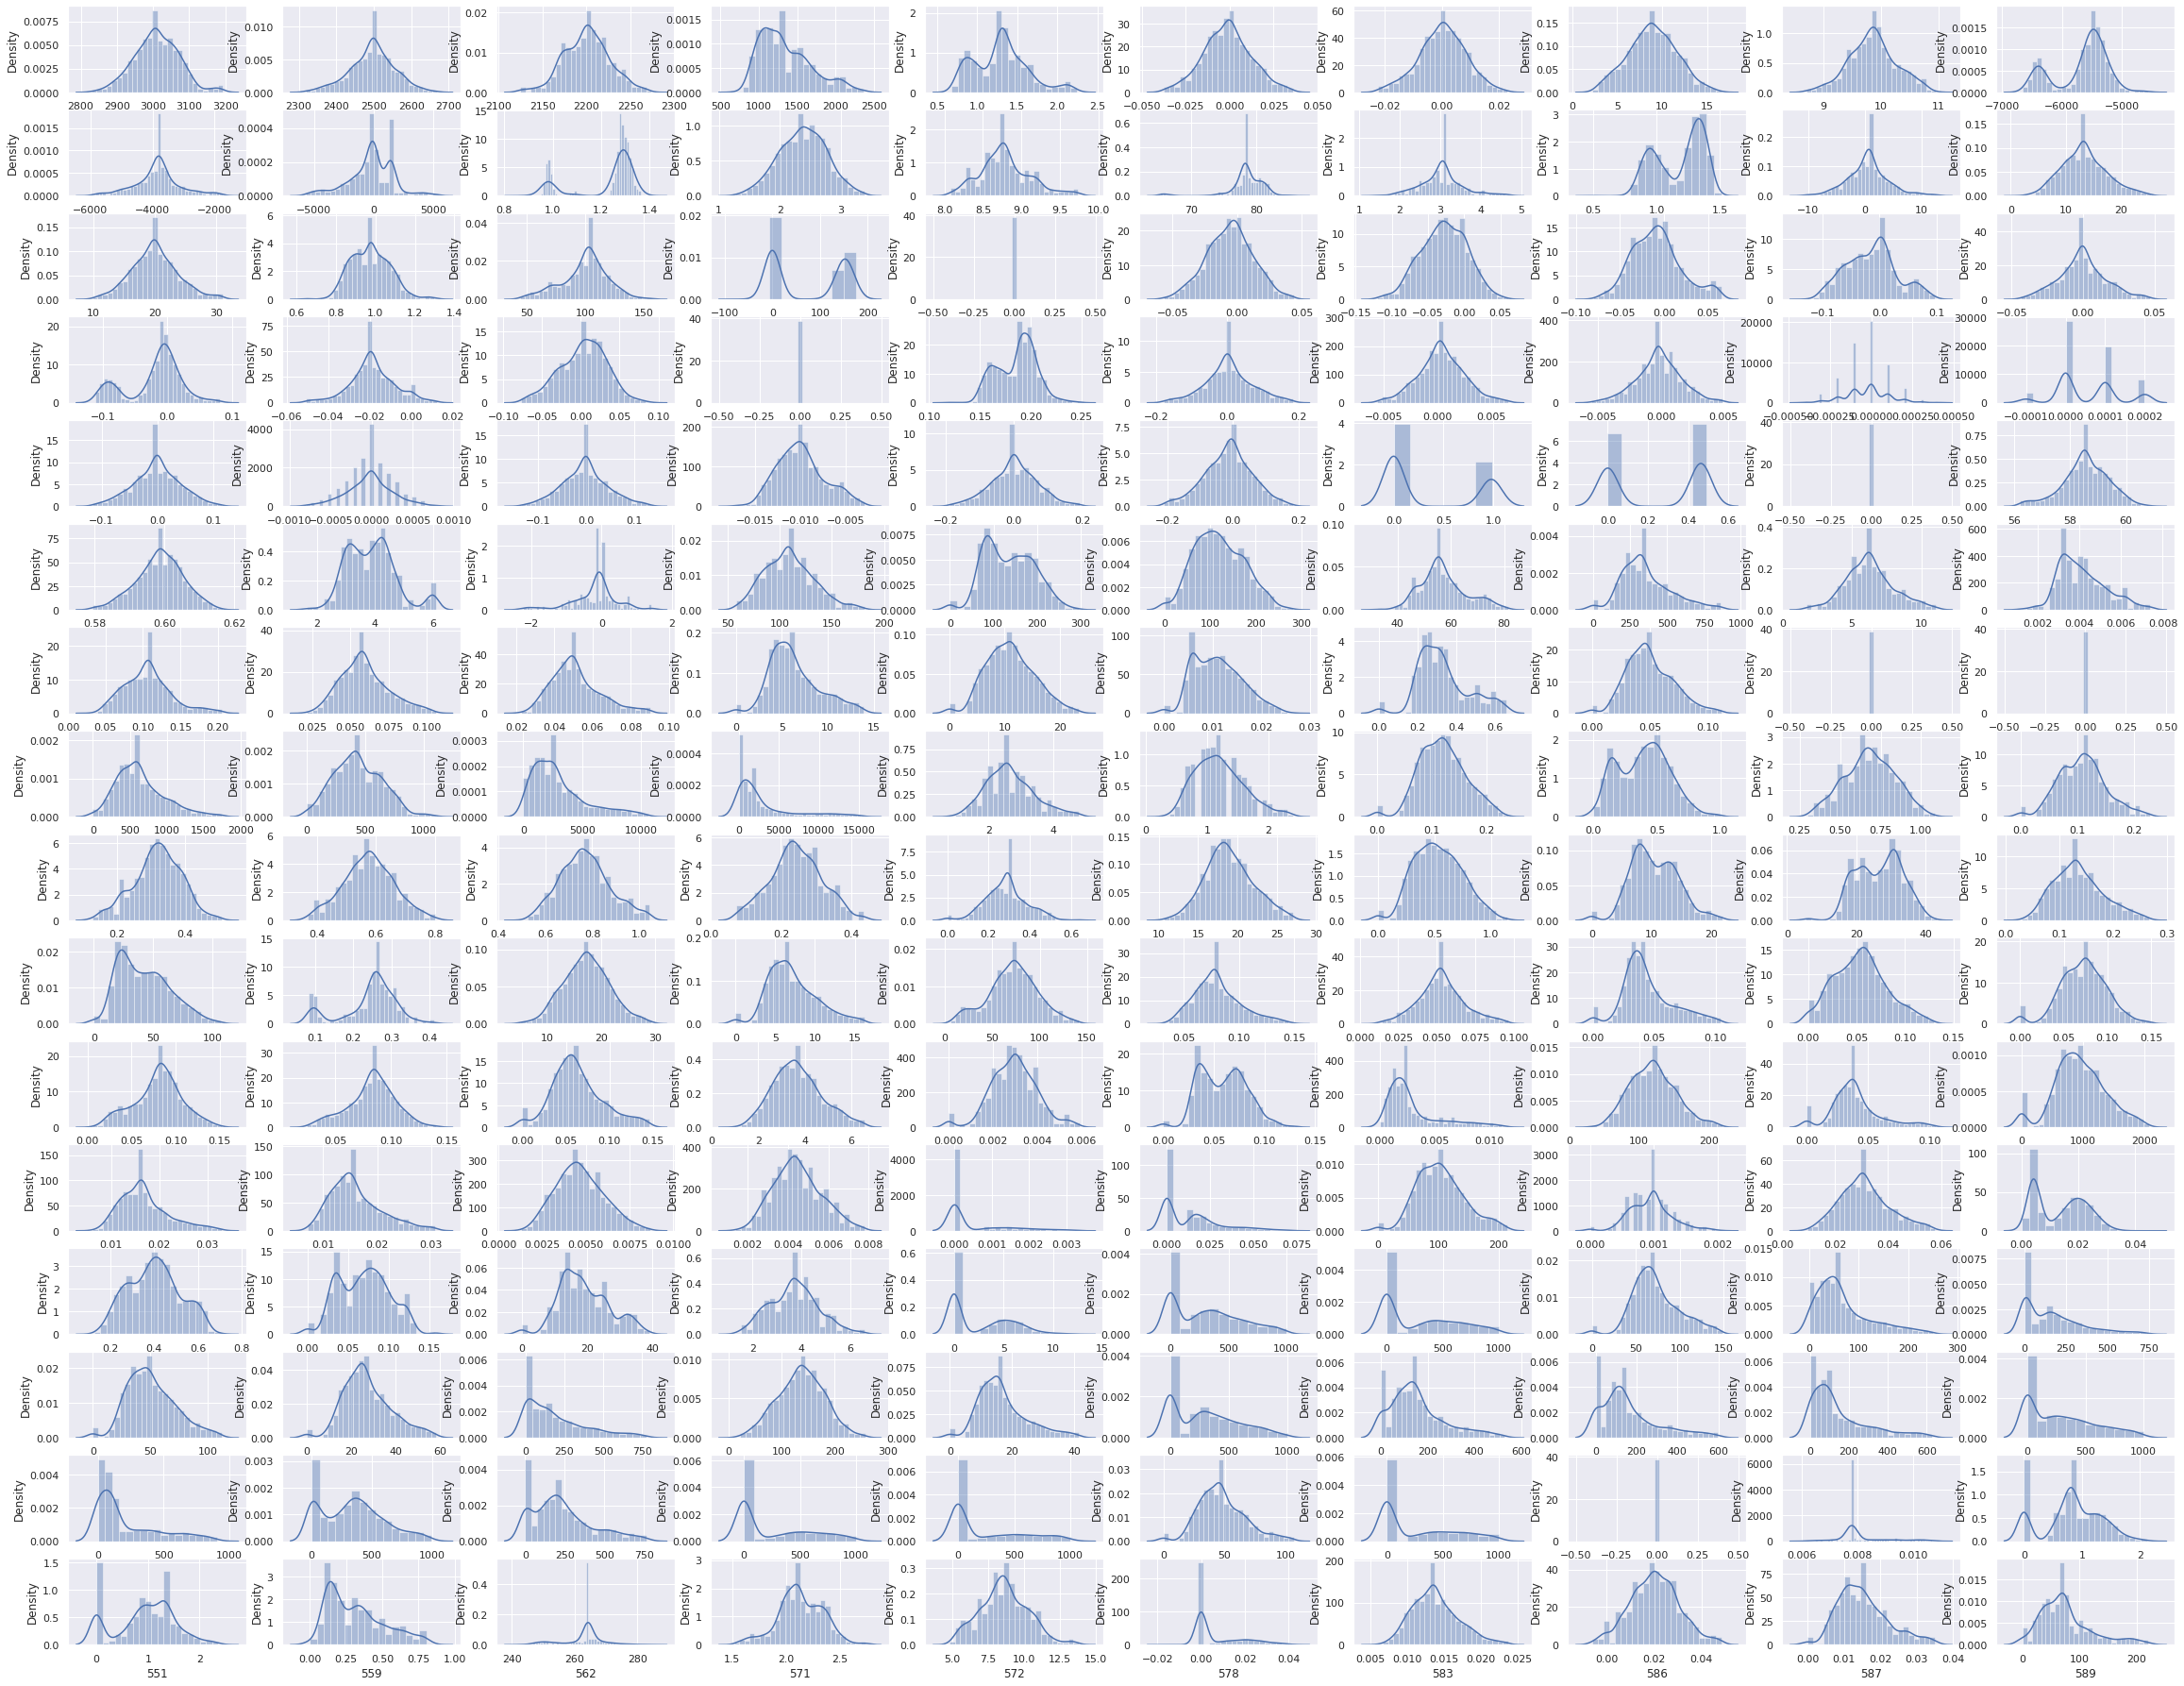

In [28]:
#density plot to check for the distribution of the variables
plt.figure(figsize=(40, 40))
col = 1
for i in data1.columns:
    plt.subplot(20, 10, col)
    sns.distplot(data1[i], color = 'b')
    col += 1 

Majority of the variable seem to have a normal distribution

In [29]:
#scaling with z-score
dataScaled= data1.apply(zscore)

dataScaled.describe().T

,count,mean,std,min,25%,50%,75%,max
0,1567.0,5.282593e-15,1.000319,-2.905188,-0.657617,-0.003238,0.674857,2.962440
1,1567.0,1.847774e-16,1.000319,-2.954991,-0.610001,0.019821,0.620663,2.876713
2,1567.0,-2.584616e-15,1.000319,-2.931404,-0.696232,-0.012425,0.637815,2.835980
3,1567.0,7.436440e-16,1.000319,-1.895313,-0.782626,-0.195701,0.608034,3.015403
4,1567.0,8.161946e-17,1.000319,-1.855428,-0.834036,0.013707,0.578366,2.857806
9,1567.0,0.000000e+00,1.000319,-2.651320,-0.669074,0.023429,0.642652,2.749475
10,1567.0,9.068829e-18,1.000319,-2.767427,-0.645650,0.012832,0.671315,2.780897
14,1567.0,3.083402e-16,1.000319,-2.484040,-0.681523,-0.021287,0.684426,2.849496
16,1567.0,2.702511e-15,1.000319,-2.818667,-0.646272,-0.028987,0.600075,2.676429
21,1567.0,-5.804050e-16,1.000319,-2.265674,-0.447203,0.324434,0.663249,2.515233


In [30]:
#databining the data
y=data['Pass/Fail']
datab=pd.concat([dataScaled,y],axis=1)

In [31]:
#dropping NaN
datab.dropna(axis=1,inplace=True)
row,column=datab.shape
print('After dropping NaN variables the dataset contains', row, 'rows and', column, 'columns')

After dropping NaN variables the dataset contains 1567 rows and 155 columns


In [32]:
#splitting the dataset into train and validation set
X=datab.iloc[0:1548,:]
val=datab.iloc[1548:,:156]
val=val.drop(['Pass/Fail'],axis=1)
X.shape

(1548, 155)

In [33]:
#creating a copy of the train data and seperating the target column and the predictor variables
sg=X.copy()
X=sg.drop(['Pass/Fail'],axis=1)
y=sg['Pass/Fail']

In [34]:
row,column=val.shape
print('The reduced validation dataset contains', row, 'rows and', column, 'columns')

The reduced validation dataset contains 19 rows and 154 columns


In [35]:
row,column=X.shape
print('The reduced training dataset contains', row, 'rows and', column, 'columns')

The reduced training dataset contains 1548 rows and 154 columns


## Trying various algorithms along with different sampling techniques

### Splitting the Past data into train and test 70:30 ratio

In [36]:
# splitting data training dataset into train and test set for independent attributes
X_train, X_test, Y_train, Y_test =train_test_split(X,y, test_size=.30,random_state=105,stratify=y)
X_train.shape

(1083, 154)

In [37]:
print("Training Fail    : {0} ({1:0.2f}%)".format(len(Y_train[Y_train[:] == 1]), (len(Y_train[Y_train[:] == 1])/len(Y_train)) * 100))
print("Training Pass  : {0} ({1:0.2f}%)".format(len(Y_train[Y_train[:] == 0]), (len(Y_train[Y_train[:] == 0])/len(Y_train)) * 100))
print("")
print("Test Fail        : {0} ({1:0.2f}%)".format(len(Y_test[Y_test[:] == 1]), (len(Y_test[Y_test[:] == 1])/len(Y_test)) * 100))
print("Test Pass       : {0} ({1:0.2f}%)".format(len(Y_test[Y_test[:] == 0]), (len(Y_test[Y_test[:] == 0])/len(Y_test)) * 100))
print("")

Training Fail    : 70 (6.46%)
Training Pass  : 1013 (93.54%)

Test Fail        : 30 (6.45%)
Test Pass       : 435 (93.55%)



### No sampling

In [38]:
# Initializaing various classification algorithms with normal dataset and choosing the best model based on f1 score for tuning
print(X_train.shape)
models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("GNB", GaussianNB()))
models.append(("SVM", SVC(kernel='linear')))
models.append(("DT", DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("AB", AdaBoostClassifier()))
models.append(("GBT", GradientBoostingClassifier()))
models.append(("XGB", XGBClassifier(verbosity=0)))
models.append(("LightGBM",LGBMClassifier()))

#testing models
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=55,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f%% (%f%%)' % (name, cv_results.mean()*100, cv_results.std()*100)
    print(msg)
print(X_train.shape)

(1083, 154)
LR: 8.558126% (9.923562%)
KNN: 2.500000% (7.500000%)
GNB: 11.520363% (8.446833%)
SVM: 7.149573% (8.209624%)
DT: 4.981203% (8.317218%)
RF: 0.000000% (0.000000%)
AB: 8.500000% (13.793114%)
GBT: 0.000000% (0.000000%)
XGB: 0.000000% (0.000000%)
LightGBM: 0.000000% (0.000000%)
(1083, 154)


###  Random undersampling

In [39]:
# Implementing random under sampling
under= RandomUnderSampler(sampling_strategy=0.5)
print(X_train.shape)
X_under, y_under= under.fit_resample(X_train, Y_train)

(1083, 154)


In [40]:
print("Under Training Fail    : {0} ({1:0.2f}%)".format(len(y_under[y_under[:] == 1]), (len(y_under[y_under[:] == 1])/len(y_under)) * 100))
print("under Training Pass  : {0} ({1:0.2f}%)".format(len(y_under[y_under[:] == 0]), (len(y_under[y_under[:] == 0])/len(y_under)) * 100))


Under Training Fail    : 70 (33.33%)
under Training Pass  : 140 (66.67%)


In [41]:
# Initializaing various classification algorithms with random under sampler dataset and choosing the best model based on f1 score

models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("GNB", GaussianNB()))
models.append(("SVM", SVC(kernel='linear')))
models.append(("DT", DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("AB", AdaBoostClassifier()))
models.append(("GBT", GradientBoostingClassifier()))
models.append(("XGB", XGBClassifier(verbosity=0)))
models.append(("LightGBM",LGBMClassifier()))

#testing models
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=66,shuffle=True)
    cv_results = cross_val_score(model, X_under, y_under, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f%% (%f%%)' % (name, cv_results.mean()*100, cv_results.std()*100)
    print(msg)

LR: 36.833588% (11.494861%)
KNN: 27.432567% (16.251439%)
GNB: 44.110755% (14.177724%)
SVM: 37.459737% (10.168295%)
DT: 22.072494% (10.444781%)
RF: 4.722222% (9.464847%)
AB: 36.045621% (14.749499%)
GBT: 18.055556% (17.616018%)
XGB: 30.448052% (6.921183%)
LightGBM: 22.525253% (16.014036%)


###  Smote

In [42]:
# Implementing SMOTE
smt = SMOTE(sampling_strategy=0.5)
X_SMOTE, y_SMOTE = smt.fit_resample(X_train, Y_train)
X_SMOTE.shape

(1519, 154)

In [43]:
print("SMOTE Training Fail    : {0} ({1:0.2f}%)".format(len(y_SMOTE[y_SMOTE[:] == 1]), (len(y_SMOTE[y_SMOTE[:] == 1])/len(y_SMOTE)) * 100))
print("SMOTE Training Pass  : {0} ({1:0.2f}%)".format(len(y_SMOTE[y_SMOTE[:] == 0]), (len(y_SMOTE[y_SMOTE[:] == 0])/len(y_SMOTE)) * 100))


SMOTE Training Fail    : 506 (33.31%)
SMOTE Training Pass  : 1013 (66.69%)


In [ ]:
# Initializaing various classification algorithms with Smote dataset and choosing the best model based on f1 score

models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("GNB", GaussianNB()))
models.append(("SVM", SVC(kernel='linear')))
models.append(("DT", DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("AB", AdaBoostClassifier()))
models.append(("GBT", GradientBoostingClassifier()))
models.append(("XGB", XGBClassifier(verbosity=0)))
models.append(("LightGBM",LGBMClassifier()))

#testing models
results = []
names = []


for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=25,shuffle=True)
    cv_results = cross_val_score(model, X_SMOTE, y_SMOTE, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f%% (%f%%)' % (name, cv_results.mean()*100, cv_results.std()*100)
    print(msg)

LR: 74.025205% (3.540845%)
KNN: 52.066838% (0.795633%)
GNB: 81.848435% (3.123957%)
SVM: 76.019206% (2.684638%)
DT: 81.536679% (2.619369%)
RF: 95.821907% (2.472379%)
AB: 86.163751% (3.438197%)


### Random Oversampling

In [ ]:
# Implementing random over sampling
over= RandomOverSampler(sampling_strategy=0.5)
X_over, y_over= over.fit_resample(X_train, Y_train)
X_over.shape

In [ ]:
print("over Training Fail    : {0} ({1:0.2f}%)".format(len(y_over[y_over[:] == 1]), (len(y_over[y_over[:] == 1])/len(y_over)) * 100))
print("over Training Pass  : {0} ({1:0.2f}%)".format(len(y_over[y_over[:] == 0]), (len(y_over[y_over[:] == 0])/len(y_over)) * 100))


In [ ]:
# Initializaing various classification algorithms with over sampled dataset and choosing the best model based on f1 score

models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("GNB", GaussianNB()))
models.append(("SVM", SVC(kernel='linear')))
models.append(("DT", DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("AB", AdaBoostClassifier()))
models.append(("GBT", GradientBoostingClassifier()))
models.append(("XGB", XGBClassifier(verbosity=0)))
models.append(("LightGBM",LGBMClassifier()))

#testing models
results = []
names = []


for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=69,shuffle=True)
    cv_results = cross_val_score(model, X_over, y_over, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f%% (%f%%)' % (name, cv_results.mean()*100, cv_results.std()*100)
    print(msg)

### ADASYN sampling

In [ ]:
oversample = ADASYN(sampling_strategy=0.5)
X_adasyn, y_adasyn = oversample.fit_resample(X_train, Y_train)
X_adasyn.shape

In [ ]:
print("ADASYN Training Fail    : {0} ({1:0.2f}%)".format(len(y_adasyn[y_adasyn[:] == 1]), (len(y_adasyn[y_adasyn[:] == 1])/len(y_adasyn)) * 100))
print("ADASYN Training Pass  : {0} ({1:0.2f}%)".format(len(y_adasyn[y_adasyn[:] == 0]), (len(y_adasyn[y_adasyn[:] == 0])/len(y_adasyn)) * 100))


In [ ]:
# Initializaing various classification algorithms with ADASYN dataset and choosing the best model based on f1 score

models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("GNB", GaussianNB()))
models.append(("SVM", SVC(kernel='linear')))
models.append(("DT", DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("AB", AdaBoostClassifier()))
models.append(("GBT", GradientBoostingClassifier()))
models.append(("XGB", XGBClassifier(verbosity=0)))
models.append(("LightGBM",LGBMClassifier()))

#testing models
results = []
names = []


for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=33,shuffle=True)
    cv_results = cross_val_score(model, X_adasyn, y_adasyn, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f%% (%f%%)' % (name, cv_results.mean()*100, cv_results.std()*100)
    print(msg)

### Gaussian Naive Bayes on Normal Dataset

In [ ]:
nb = GaussianNB()
nb.fit(X_train, Y_train)

In [ ]:
modelnb_score = nb.score(X_train, Y_train)
print('Accuracy Score of Training Data: ', modelnb_score)

In [ ]:
y_predictnb= nb.predict(X_test)
modelnb_score = accuracy_score(Y_test, y_predictnb)
print('Accuracy Score of Test Data:', modelnb_score)

In [ ]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(Y_test, y_predictnb, labels=[1, 0]))

In [ ]:
# visualizing confusion matrix
cm= confusion_matrix(Y_test, y_predictnb)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.xlabel('Predicted Classes', fontsize = 15)
plt.ylabel('Actual Classes', fontsize = 15)
plt.title('Confusion Matrix for GNB', fontsize = 15);

In [ ]:
#Plotting ROC and AUC
probs = nb.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc_nb = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='Gaussian Naive Bayes (AUC = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'threshold' : pd.Series(threshold, index = i)})
print(roc.loc[(roc.tf-0).abs().argsort()[:1]])

In [ ]:
# store the predicted probabilities for Failed Class. 
y_pred_prob = nb.predict_proba(X_test)[:, 1]

y_pred_class = binarize([y_pred_prob], 0.0161)[0]

In [ ]:
# visualizing confusion matrix
cm= confusion_matrix(Y_test, y_pred_class)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for GNB', fontsize = 15);

In [ ]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(Y_test, y_pred_class, labels=[1, 0]))

In [ ]:
precision_nb, recall_nb, f1_score_nb, support = precision_recall_fscore_support(Y_test, y_pred_class, average = 'macro')
print('Precision Score :', '%0.2f' % precision_nb)
print('Recall Score :', '%0.2f' % recall_nb)
print('F1-Score:', '%0.2f' % f1_score_nb)
nb_acc= accuracy_score(Y_test, y_predictnb)
print('Accuracy Score :','%0.2f' % nb_acc)
print('AUC :','%0.2f' % roc_auc_nb)
print('Thresholdnb :','%0.2f' % 0.016)
Thresholdnb=0.016

### Gaussian Naive Bayes on Under sampled Data

In [ ]:
nbu = GaussianNB()
nbu.fit(X_under, y_under)

In [ ]:
modelnbu_score = nbu.score(X_under,y_under)
print('Accuracy Score of Training Data: ', modelnbu_score)

In [ ]:
y_predictnbu= nbu.predict(X_test)
modelnbu_score = accuracy_score(Y_test, y_predictnbu)
print('Accuracy Score of Test Data:', modelnbu_score)

In [ ]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(Y_test, y_predictnbu, labels=[1, 0]))

In [ ]:
# visualizing confusion matrix
cm= confusion_matrix(Y_test, y_predictnbu)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for GNB Under sampled', fontsize = 15);

In [ ]:
#Plotting ROC and AUC
probs = nbu.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc_nbu = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='Gaussian NB under sampled (AUC = %0.2f)' % roc_auc_nbu)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'threshold' : pd.Series(threshold, index = i)})
print(roc.loc[(roc.tf-0).abs().argsort()[:1]])

In [ ]:
# store the predicted probabilities for failed class 
y_pred_prob = nbu.predict_proba(X_test)[:, 1]
# predict fail if the predicted probability is greater than 0.4753
y_pred_class = binarize([y_pred_prob], 0.4753)[0]

In [ ]:
# visualizing confusion matrix
cm= confusion_matrix(Y_test, y_pred_class)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for GNB Under sampled', fontsize = 15);

In [ ]:
precision_nbu, recall_nbu, f1_score_nbu, support = precision_recall_fscore_support(Y_test, y_pred_class, average = 'macro')
print('Precision Score :', '%0.2f' % precision_nbu)
print('Recall Score :', '%0.2f' % recall_nbu)
print('F1-Score:', '%0.2f' % f1_score_nbu)
nbu_acc= accuracy_score(Y_test, y_predictnbu)
print('Accuracy Score :','%0.2f' % nbu_acc)
print('AUC :','%0.2f' % roc_auc_nbu)
print('Thresholdnbu:','%0.2f' % 0.4753)
Thresholdnbu=0.4753

### LightGBM on Smote sampled Dataset

In [ ]:
param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

sample = 100

#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum
lgb = LGBMClassifier(max_depth=-1, random_state=31, silent=True, metric='f1', n_jobs=4, n_estimators=2000)
gs = RandomizedSearchCV(
    estimator=lgb, param_distributions=param_test, 
    n_iter=sample,
    scoring='f1',
    cv=5,
    refit=True,
    random_state=314,
    verbose=True)

gs.fit(X_SMOTE, y_SMOTE)
gs.best_params_

In [ ]:
lgb=LGBMClassifier(colsample_bytree=0.95,
 min_child_samples= 111,
 min_child_weight= 0.01,
 num_leaves= 38,
 reg_alpha= 0,
 reg_lambda= 0.1,
 subsample=0.30)
lgb.fit(X_SMOTE,y_SMOTE)

In [ ]:
modellgb1=lgb.score(X_SMOTE,y_SMOTE)
print('Accuracy Score of Training Data: ', modellgb1)

In [ ]:
y_predictlg1= lgb.predict(X_test)
modellg1 = accuracy_score(Y_test, y_predictlg1)
print('Accuracy Score of Test Data:', modellg1)

In [ ]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(Y_test, y_predictlg1, labels=[1, 0]))

In [ ]:
# visualizing confusion matrix
cm= confusion_matrix(Y_test, y_predictlg1)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for LGBM Smote', fontsize = 15);

In [ ]:
#Plotting ROC and AUC
probs = lgb.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc_lg = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='LGBM Smote sampled (AUC = %0.2f)' % roc_auc_lg)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'threshold' : pd.Series(threshold, index = i)})
print(roc.loc[(roc.tf-0).abs().argsort()[:1]])

In [ ]:
# store the predicted probabilities for failed class 
y_pred_prob = lgb.predict_proba(X_test)[:, 1]
# predict fail if the predicted probability is greater than 0.0314
y_pred_class = binarize([y_pred_prob], 0.0314)[0]

In [ ]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(Y_test, y_pred_class, labels=[1, 0]))

In [ ]:
# visualizing confusion matrix
cm= confusion_matrix(Y_test, y_pred_class)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for LGBM Smote', fontsize = 15);

In [ ]:
precision_lg, recall_lg, f1_score_lg, support = precision_recall_fscore_support(Y_test, y_pred_class, average = 'macro')
print('Precision Score :', '%0.2f' % precision_lg)
print('Recall Score :', '%0.2f' % recall_lg)
print('F1-Score:', '%0.2f' % f1_score_lg)
lg_acc= accuracy_score(Y_test, y_pred_class)
print('Accuracy Score :','%0.2f' % lg_acc)
print('AUC :','%0.2f' % roc_auc_lg)
print('Thresholdlg :','%0.2f' % 0.0314)
Thresholdlg=0.0314

### RandomForest on Random over sampled Dataset

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 50)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = range(2,100,5)
# Minimum number of samples required at each leaf node
min_samples_leaf = range(1,100,10)
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
                'criterion':['gini','entropy']}

In [ ]:
X_over.shape

In [ ]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 5, verbose=2, random_state=90, n_jobs = -1)
rf_random.fit(X_over, y_over)
rf_random.best_params_

In [ ]:
rf_grid1 = RandomForestClassifier(n_estimators=463,
 min_samples_split= 82,
 min_samples_leaf=1,
 max_features= 'sqrt',
 max_depth= 110,
 criterion= 'gini',
 bootstrap= False)
rf_grid1.fit(X_over, y_over)

In [ ]:
modelrfg1_score=rf_grid1.score(X_over,y_over)
print('Accuracy Score of Training Data: ', modelrfg1_score)

In [ ]:
y_predictrfg1= rf_grid1.predict(X_test)
modelrfg1_score = accuracy_score(Y_test, y_predictrfg1)
print('Accuracy Score of Test Data:', modelrfg1_score)

In [ ]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(Y_test, y_predictrfg1, labels=[1, 0]))

In [ ]:
# visualizing confusion matrix
cm= confusion_matrix(Y_test, y_predictrfg1)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for RF Over Sampled', fontsize = 15);

In [ ]:
#Plotting ROC and AUC
probs = rf_grid1.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc_rfo = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='RF over sampled (AUC = %0.2f)' % roc_auc_rfo)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'threshold' : pd.Series(threshold, index = i)})
print(roc.loc[(roc.tf-0).abs().argsort()[:1]])

In [ ]:
# store the predicted probabilities  for failed class 
y_pred_prob = rf_grid1.predict_proba(X_test)[:, 1]
# predict fail if the predicted probability is greater than 0.1688
y_pred_class = binarize([y_pred_prob], 0.1688)[0]

In [ ]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(Y_test, y_pred_class, labels=[1, 0]))

In [ ]:
# visualizing confusion matrix
cm= confusion_matrix(Y_test, y_pred_class)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for RF Over Sampled', fontsize = 15);

In [ ]:
precision_rfo, recall_rfo, f1_score_rfo, support = precision_recall_fscore_support(Y_test, y_pred_class, average = 'macro')
print('Precision Score :', '%0.2f' % precision_rfo)
print('Recall Score :', '%0.2f' % recall_rfo)
print('F1-Score:', '%0.2f' % f1_score_rfo)
rfo_acc= accuracy_score(Y_test, y_pred_class)
print('Accuracy Score :','%0.2f' % rfo_acc)
print('AUC :','%0.2f' % roc_auc_rfo)
print('Thresholdrf :','%0.2f' % 0.1688)
Thresholdrf=0.1688

### LightGBM on ADASYN sampled Dataset

In [ ]:
param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

sample = 100

#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum
lgb = LGBMClassifier(max_depth=-1, random_state=31, silent=True, metric='f1', n_jobs=4, n_estimators=2000)
gs = RandomizedSearchCV(
    estimator=lgb, param_distributions=param_test, 
    n_iter=sample,
    scoring='f1',
    cv=5,
    refit=True,
    random_state=314,
    verbose=True)

gs.fit(X_adasyn, y_adasyn)
gs.best_params_

In [ ]:
lgb=LGBMClassifier(colsample_bytree=0.95,
 min_child_samples= 111,
 min_child_weight= 0.01,
 num_leaves= 38,
 reg_alpha= 0,
 reg_lambda= 0.1,
 subsample=0.30)
lgb.fit(X_adasyn,y_adasyn)

In [ ]:
modellgb=lgb.score(X_adasyn,y_adasyn)
print('Accuracy Score of Training Data: ', modellgb)

In [ ]:
y_predictlg= lgb.predict(X_test)
modellg = accuracy_score(Y_test, y_predictlg)
print('Accuracy Score of Test Data:', modellg)

In [ ]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(Y_test, y_predictlg, labels=[1, 0]))

In [ ]:
#Plotting ROC and AUC
probs = lgb.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc_lg1 = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='LGBM ADASYN (AUC = %0.2f)' % roc_auc_lg1)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'threshold' : pd.Series(threshold, index = i)})
print(roc.loc[(roc.tf-0).abs().argsort()[:1]])

In [ ]:
# store the predicted probabilities for failed class 
y_pred_prob = lgb.predict_proba(X_test)[:, 1]
# predict fail for predicted probability is greater than 0.04176
y_pred_class = binarize([y_pred_prob], 0.0417)[0]

In [ ]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(Y_test, y_pred_class, labels=[1, 0]))

In [ ]:
# visualizing confusion matrix
cm= confusion_matrix(Y_test, y_pred_class)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for LGBM ADASYN', fontsize = 15);

In [ ]:
precision_lg1, recall_lg1, f1_score_lg1, support = precision_recall_fscore_support(Y_test, y_pred_class, average = 'macro')
print('Precision Score :', '%0.2f' % precision_lg1)
print('Recall Score :', '%0.2f' % recall_lg1)
print('F1-Score:', '%0.2f' % f1_score_lg1)
lg1_acc= accuracy_score(Y_test, y_pred_class)
print('Accuracy Score :','%0.2f' % lg1_acc)
print('AUC :','%0.2f' % roc_auc_lg1)
print('Thresholdlg1 :','%0.2f' % 0.0417)
Thresholdlg1=0.0417

In [ ]:
modellists = []
modellists.append(['Gaussian NB Normal Data', nb_acc * 100, recall_nb * 100, precision_nb * 100,roc_auc_nb*100,f1_score_nb*100,Thresholdnb])
modellists.append(['Gausian NB under samples data', nbu_acc* 100, recall_nbu * 100, precision_nbu* 100,roc_auc_nbu*100,f1_score_nbu*100,Thresholdnbu])
modellists.append(['LGBM Smote sampled Data', lg_acc * 100, recall_lg * 100, precision_lg * 100,roc_auc_lg*100,f1_score_lg*100,Thresholdlg])
modellists.append(['Random Forest Over sampled Data', rfo_acc * 100, recall_rfo * 100, precision_rfo * 100,roc_auc_rfo*100,f1_score_rfo*100,Thresholdrf])
modellists.append(['LGBM ADASYN sampled Data', lg1_acc * 100, recall_lg1 * 100, precision_lg1 * 100,roc_auc_lg1*100,f1_score_lg1*100,Thresholdlg1])
model_df = pd.DataFrame(modellists, columns = ['Model', 'Accuracy Scores on Test', 'Recall Score', 'Precision Score','AUC','F1 Score','Threshold'])
model_df

### Fitting the resuts on the validation/future dataset

In [ ]:
#making copies of validation dataset
val1=val.copy()
val1=val1.reset_index(drop=True)
val1=pd.DataFrame(val1)
val2=val.copy()
val2=val2.reset_index(drop=True)
val2=pd.DataFrame(val2)
val3=val.copy()
val3=val3.reset_index(drop=True)
val3=pd.DataFrame(val3)
val4=val.copy()
val4=val4.reset_index(drop=True)
val4=pd.DataFrame(val4)

In [ ]:
#Fitting Random forest
rf_grid1.fit(X_over, y_over)
pred=rf_grid1.predict(val1)
val1['Pass/Fail'] = pred
val1 = val1[(val1['Pass/Fail'] == 1)]
val1.head()

In [ ]:
#fitting Random Forest with threshold
# store the predicted probabilities  for failed class 
y_pred_prob = rf_grid1.predict_proba(val2)[:, 1]
# predict fail if the predicted probability is greater than 0.1688
pred = binarize([y_pred_prob], 0.1688)[0]
val2['Pass/Fail'] = pred
val2 = val2[(val2['Pass/Fail'] == 1)]
val2.head(18)

In [ ]:
#fiiting naive bayes on validation dataset
nb = GaussianNB()
nb.fit(X_train, Y_train)
pred=nb.predict(val3)
val3['Pass/Fail'] = pred
val3 = val3[(val3['Pass/Fail'] == 1)]
val3.head(18)

In [ ]:
#fitting naive bayes with threshold
# store the predicted probabilities  for failed class 
y_pred_prob = nb.predict_proba(val4)[:, 1]
# predict fail if the predicted probability is greater than 0.1555
pred = binarize([y_pred_prob], 0.01)[0]
val4['Pass/Fail'] = pred
val4 = val4[(val4['Pass/Fail'] == 1)]
val4.head(19)

### Observations:
1) Gaussian Naive bayes without any sampling gives a sensitivity of 48% with a type 2 error rate of 52%, while predicting 9 observation to have failed, adding  &emsp; a threshold of 0.016 gives a sensitivity of 71% and reduces type 2 error rate by 23% with and increase in type 1 error rate by 17% while predicting 14  <br/> &emsp;observations to have failed. <br/>
2) Random Forest with Randomly over sampled data gives 100% specificity and type 2 error while predicting 1 observation to have failed, adding a threshold &emsp;  of 0.1688 gives a sensitivity of 71% and type 2 error rate reduces by 71% with and increase in type 1 error rate by 27% while predicting 7 observations as <br/> &emsp;  failed. <br/>
3) Futher more we could have tried modeling the data based on only the important variable from variable importance plot to check if performance of the model  &emsp; increases.



## PCA to check if the dimensions can be reduced future more and rebuild the models as above

In [ ]:
#Load the data and pre-processing for pca
data=pd.read_csv('Signal-data.csv')
data=data.drop(['Time'],axis=1)
#dropping the columns the have constant signal
cols = data.select_dtypes([np.number]).columns
std = data[cols].std()
cols_to_drop = std[std==0].index
data.drop(cols_to_drop, axis=1,inplace=True)
#label encoding the target class
data['Pass/Fail']=data['Pass/Fail'].replace([-1,1],[0,1])
#replacing the NaN/NA with zero and considering it as no signal
data.fillna(0,inplace=True)
row,column=data.shape
print('The dataset contains', row, 'rows and', column, 'columns')

In [ ]:
sg=data.iloc[0:1548,:]
y=sg['Pass/Fail']
sg=sg.drop(['Pass/Fail'],axis=1)
row,column=sg.shape
print('The past dataset contains', row, 'rows and', column, 'columns')

In [ ]:
val=data.iloc[1548:1567,:]
val=val.drop(['Pass/Fail'],axis=1)
row,column=val.shape
print('The validation dataset contains', row, 'rows and', column, 'columns')

In [ ]:
#scaling with z-score
dataScaled= data.apply(zscore)  
#dropping NaN
dataScaled.dropna(axis=1,inplace=True)
dataScaled=dataScaled.drop(['Pass/Fail'],axis=1)

In [ ]:
#splitting the dataset into train and validation set
X=dataScaled.iloc[0:1548,:]
val=dataScaled.iloc[1548:,:]
X.shape,val.shape

In [ ]:
from sklearn.decomposition import PCA
#extracting dataponenets that explaint 95% of the variation
pca = PCA(.95)
pca_ = pca.fit_transform(X)
pca

In [ ]:
X_pca = pca.transform(X)  # PCs for the train data
val_pca = pca.transform(val)    # PCs for the test data

X_pca.shape, val_pca.shape

In [ ]:
pca.explained_variance_

In [ ]:
#creating a dataframe of the dataponenets and attaching it to the target class
pca_df = pd.DataFrame(data = X_pca)
df=pd.concat([pca_df,y],axis=1)
df.head()

In [ ]:
#seperating the DV and IDV
X=df.drop(['Pass/Fail'],axis=1)
y=df['Pass/Fail']

## Trying various algorithms along with different sampling techniques

### Splitting the Past data into train and test 70:30 ratio

In [ ]:
# splitting data into training and test set for independent attributes
X_train, X_test, Y_train, Y_test =train_test_split(X,y, test_size=.30,random_state=105,stratify=y)

In [ ]:
print("Training Fail    : {0} ({1:0.2f}%)".format(len(Y_train[Y_train[:] == 1]), (len(Y_train[Y_train[:] == 1])/len(Y_train)) * 100))
print("Training Pass  : {0} ({1:0.2f}%)".format(len(Y_train[Y_train[:] == 0]), (len(Y_train[Y_train[:] == 0])/len(Y_train)) * 100))
print("")
print("Test Fail        : {0} ({1:0.2f}%)".format(len(Y_test[Y_test[:] == 1]), (len(Y_test[Y_test[:] == 1])/len(Y_test)) * 100))
print("Test Pass       : {0} ({1:0.2f}%)".format(len(Y_test[Y_test[:] == 0]), (len(Y_test[Y_test[:] == 0])/len(Y_test)) * 100))
print("")

In [ ]:
# Initializaing various classification algorithms with normal dataset

models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("GNB", GaussianNB()))
models.append(("SVM", SVC(kernel='linear')))
models.append(("DT", DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("AB", AdaBoostClassifier()))
models.append(("GBT", GradientBoostingClassifier()))
models.append(("XGB", XGBClassifier(verbosity=0)))
models.append(("LightGBM",LGBMClassifier()))

#testing models
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=55,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f%% (%f%%)' % (name, cv_results.mean()*100, cv_results.std()*100)
    print(msg)

### Random Undersampling

In [ ]:
# Implementing random under sampling
under= RandomUnderSampler(sampling_strategy=0.5)
X_under, y_under= under.fit_resample(X_train, Y_train)

In [ ]:
print("Under Training Fail    : {0} ({1:0.2f}%)".format(len(y_under[y_under[:] == 1]), (len(y_under[y_under[:] == 1])/len(y_under)) * 100))
print("under Training Pass  : {0} ({1:0.2f}%)".format(len(y_under[y_under[:] == 0]), (len(y_under[y_under[:] == 0])/len(y_under)) * 100))


In [ ]:
# Initializaing various classification algorithms with under sampled dataset

models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("GNB", GaussianNB()))
models.append(("SVM", SVC(kernel='linear')))
models.append(("DT", DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("AB", AdaBoostClassifier()))
models.append(("GBT", GradientBoostingClassifier()))
models.append(("XGB", XGBClassifier(verbosity=0)))
models.append(("LightGBM",LGBMClassifier()))

#testing models
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=77,shuffle=True)
    cv_results = cross_val_score(model, X_under, y_under, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f%% (%f%%)' % (name, cv_results.mean()*100, cv_results.std()*100)
    print(msg)

### Smote

In [ ]:
# Implementing SMOTE
smt = SMOTE(sampling_strategy=0.5)
X_SMOTE, y_SMOTE = smt.fit_resample(X_train, Y_train)

In [ ]:
print("SMOTE Training Fail    : {0} ({1:0.2f}%)".format(len(y_SMOTE[y_SMOTE[:] == 1]), (len(y_SMOTE[y_SMOTE[:] == 1])/len(y_SMOTE)) * 100))
print("SMOTE Training Pass  : {0} ({1:0.2f}%)".format(len(y_SMOTE[y_SMOTE[:] == 0]), (len(y_SMOTE[y_SMOTE[:] == 0])/len(y_SMOTE)) * 100))


In [ ]:
# Initializaing various classification algorithms with smote sampled dataset

models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("GNB", GaussianNB()))
models.append(("SVM", SVC(kernel='linear')))
models.append(("DT", DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("AB", AdaBoostClassifier()))
models.append(("GBT", GradientBoostingClassifier()))
models.append(("XGB", XGBClassifier(verbosity=0)))
models.append(("LightGBM",LGBMClassifier()))

#testing models
results = []
names = []


for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=87,shuffle=True)
    cv_results = cross_val_score(model, X_SMOTE, y_SMOTE, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f%% (%f%%)' % (name, cv_results.mean()*100, cv_results.std()*100)
    print(msg)

### Random Oversampling

In [ ]:
# Implementing random over sampling
over= RandomOverSampler(sampling_strategy=0.5)
X_over, y_over= over.fit_resample(X_train, Y_train)

In [ ]:
print("over Training Fail    : {0} ({1:0.2f}%)".format(len(y_over[y_over[:] == 1]), (len(y_over[y_over[:] == 1])/len(y_over)) * 100))
print("over Training Pass  : {0} ({1:0.2f}%)".format(len(y_over[y_over[:] == 0]), (len(y_over[y_over[:] == 0])/len(y_over)) * 100))

In [ ]:
# Initializaing various classification algorithms with over sampled dataset

models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("GNB", GaussianNB()))
models.append(("SVM", SVC(kernel='linear')))
models.append(("DT", DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("AB", AdaBoostClassifier()))
models.append(("GBT", GradientBoostingClassifier()))
models.append(("XGB", XGBClassifier(verbosity=0)))
models.append(("LightGBM",LGBMClassifier()))

#testing models
results = []
names = []


for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=9,shuffle=True)
    cv_results = cross_val_score(model, X_over, y_over, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f%% (%f%%)' % (name, cv_results.mean()*100, cv_results.std()*100)
    print(msg)

### ADASYN sampling

In [ ]:
oversample = ADASYN(sampling_strategy=0.5)
X_adasyn, y_adasyn = oversample.fit_resample(X_train, Y_train)

In [ ]:
print("ADASYN Training Fail    : {0} ({1:0.2f}%)".format(len(y_adasyn[y_adasyn[:] == 1]), (len(y_adasyn[y_adasyn[:] == 1])/len(y_adasyn)) * 100))
print("ADASYN Training Pass  : {0} ({1:0.2f}%)".format(len(y_adasyn[y_adasyn[:] == 0]), (len(y_adasyn[y_adasyn[:] == 0])/len(y_adasyn)) * 100))


In [ ]:
# Initializaing various classification algorithms with ADASYN sampled dataset

models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("GNB", GaussianNB()))
models.append(("SVM", SVC(kernel='linear')))
models.append(("DT", DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("AB", AdaBoostClassifier()))
models.append(("GBT", GradientBoostingClassifier()))
models.append(("XGB", XGBClassifier(verbosity=0)))
models.append(("LightGBM",LGBMClassifier()))

#testing models
results = []
names = []


for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=23,shuffle=True)
    cv_results = cross_val_score(model, X_adasyn, y_adasyn, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f%% (%f%%)' % (name, cv_results.mean()*100, cv_results.std()*100)
    print(msg)

### Logistic Regression with Normal dataset

In [ ]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : [1,2,4],
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

lg=LogisticRegression()

log = GridSearchCV(lg, param_grid = param_grid, cv = 5, verbose=2, n_jobs=-1)
log.fit(X_train,Y_train)
log.best_estimator_

In [ ]:
lg=LogisticRegression(C=1, max_iter=1000, penalty='l1', solver='saga')
lg.fit(X_train,Y_train)

In [ ]:
modellg= lg.score(X_train, Y_train)
print('Accuracy Score of Training Data: ', modellg)

In [ ]:
y_predictlg= lg.predict(X_test)
modellg = accuracy_score(Y_test, y_predictlg)
print('Accuracy Score of Test Data:', modellg)

In [ ]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(Y_test, y_predictlg, labels=[1, 0]))

In [ ]:
# visualizing confusion matrix
cm= confusion_matrix(Y_test, y_predictlg)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix Log Reg', fontsize = 15);

In [ ]:
#Plotting ROC and AUC
probs = lg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc_lg = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='LogisticReg (AUC = %0.2f)' % roc_auc_lg)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'threshold' : pd.Series(threshold, index = i)})
print(roc.loc[(roc.tf-0).abs().argsort()[:1]])

In [ ]:
# store the predicted probabilities for failed class 
y_pred_prob = lg.predict_proba(X_test)[:, 1]
# predict failed if the predicted probability is greater than 0.0376
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.0369)[0]

In [ ]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(Y_test, y_pred_class, labels=[1, 0]))

In [ ]:
# visualizing confusion matrix
cm= confusion_matrix(Y_test, y_pred_class)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for Log Reg', fontsize = 15);

In [ ]:
precision_lg, recall_lg, f1_score_lg, support = precision_recall_fscore_support(Y_test, y_pred_class, average = 'macro')
print('Precision Score :', '%0.2f' % precision_lg)
print('Recall Score :', '%0.2f' % recall_lg)
print('F1-Score:', '%0.2f' % f1_score_lg)
lg_acc= accuracy_score(Y_test, y_pred_class)
print('Accuracy Score :','%0.2f' % lg_acc)
print('AUC :','%0.2f' % roc_auc_lg)
print('Threshold :','%0.2f' % 0.0376)
Thresholdlo=0.0376

### SVM with Under Sampled Dataset

In [ ]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
# Make grid search classifier
svm_grid= GridSearchCV(SVC(), param_grid, verbose = 2,cv=5, n_jobs = -1)
 
# Train the classifier
svm_grid.fit(X_under, y_under)
svm_grid.best_params_

In [ ]:
svc_cv = SVC(kernel = 'sigmoid', gamma = 0.001, C = 1,probability=True)
svc_cv.fit(X_under,y_under)

In [ ]:
modelsv_score = svc_cv.score(X_under, y_under)
print('Accuracy Score of Training Data: ', modelsv_score)

In [ ]:
y_predictsv= svc_cv.predict(X_test)
modelsv_score = accuracy_score(Y_test, y_predictsv)
print('Accuracy Score of Test Data:', modelsv_score)

In [ ]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(Y_test, y_predictsv, labels=[1, 0]))

In [ ]:
# visualizing confusion matrix
cm= confusion_matrix(Y_test, y_predictsv)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for SVC', fontsize = 15);

In [ ]:
#Plotting ROC and AUC
probs = svc_cv.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc_sv = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='SVC (AUC = %0.2f)' % roc_auc_sv)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'threshold' : pd.Series(threshold, index = i)})
print(roc.loc[(roc.tf-0).abs().argsort()[:1]])

In [ ]:
# store the predicted probabilities for failed class 
y_pred_prob = svc_cv.predict_proba(X_test)[:, 1]
# predict failed if the predicted probability is greater than 0.3307
y_pred_class = binarize([y_pred_prob], 0.3307)[0]

In [ ]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(Y_test, y_pred_class, labels=[1, 0]))

In [ ]:
# visualizing confusion matrix
cm= confusion_matrix(Y_test, y_pred_class)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for SVC', fontsize = 15);

In [ ]:
precision_sv, recall_sv, f1_score_sv, support = precision_recall_fscore_support(Y_test, y_pred_class, average = 'macro')
print('Precision Score :', '%0.2f' % precision_sv)
print('Recall Score :', '%0.2f' % recall_sv)
print('F1-Score:', '%0.2f' % f1_score_sv)
sv_acc= accuracy_score(Y_test, y_pred_class)
print('Accuracy Score :','%0.2f' % sv_acc)
print('AUC :','%0.2f' % roc_auc_sv)
print('Threshold :','%0.2f' % 0.3307)
Thresholdsv=0.3307

### LightGBM with Smote Sampled Dataset

In [ ]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

sample = 100

#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum
lgb = LGBMClassifier(max_depth=-1, random_state=31, silent=True, metric='f1', n_jobs=4, n_estimators=2000)
gs = RandomizedSearchCV(
    estimator=lgb, param_distributions=param_test, 
    n_iter=sample,
    scoring='f1',
    cv=5,
    refit=True,
    random_state=314,
    verbose=True)

gs.fit(X_SMOTE, y_SMOTE)
gs.best_params_

In [ ]:
lgb=LGBMClassifier(colsample_bytree=0.95,
 min_child_samples= 111,
 min_child_weight= 0.01,
 num_leaves= 38,
 reg_alpha= 0,
 reg_lambda= 0.1,
 subsample=0.30)
lgb.fit(X_SMOTE,y_SMOTE)

In [ ]:
modellgbm=lgb.score(X_under,y_under)
print('Accuracy Score of Training Data: ', modellgbm)

In [ ]:
y_predictlgm= lgb.predict(X_test)
modellgm = accuracy_score(Y_test, y_predictlgm)
print('Accuracy Score of Test Data:', modellgm)

In [ ]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(Y_test, y_predictlgm, labels=[1, 0]))

In [ ]:
# visualizing confusion matrix
cm= confusion_matrix(Y_test, y_predictlgm)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for LGBM smote', fontsize = 15);

In [ ]:
#Plotting ROC and AUC
probs = lgb.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc_lgm = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='LGBM (AUC = %0.2f)' % roc_auc_lgm)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'threshold' : pd.Series(threshold, index = i)})
print(roc.loc[(roc.tf-0).abs().argsort()[:1]])

In [ ]:
# store the predicted probabilities for diabetic class for all records... 
y_pred_prob = lgb.predict_proba(X_test)[:, 1]
# predict diabetes if the predicted probability is greater than 0.0441
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.0477)[0]

In [ ]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(Y_test, y_pred_class, labels=[1, 0]))

In [ ]:
# visualizing confusion matrix
cm= confusion_matrix(Y_test, y_pred_class)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for LGBM smote', fontsize = 15);

In [ ]:
precision_lgm, recall_lgm, f1_score_lgm, support = precision_recall_fscore_support(Y_test, y_pred_class, average = 'macro')
print('Precision Score :', '%0.2f' % precision_lgm)
print('Recall Score :', '%0.2f' % recall_lgm)
print('F1-Score:', '%0.2f' % f1_score_lgm)
lgm_acc= accuracy_score(Y_test, y_pred_class)
print('Accuracy Score :','%0.2f' % lgm_acc)
print('AUC :','%0.2f' % roc_auc_lgm)
print('Threshold :','%0.2f' % 0.0477)
Thresholdlg=0.0444

### Random Forest with Over sampled Dataset

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 50)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = range(2,100,5)
# Minimum number of samples required at each leaf node
min_samples_leaf = range(1,100,10)
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
                'criterion':['gini','entropy']}

In [ ]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 5, verbose=2, random_state=90, n_jobs = -1)
rf_random.fit(X_over, y_over)
rf_random.best_params_

In [ ]:
rf_grid1 = RandomForestClassifier(n_estimators=463,
 min_samples_split= 82,
 min_samples_leaf=1,
 max_features= 'sqrt',
 max_depth= 110,
 criterion= 'gini',
 bootstrap= False)
rf_grid1.fit(X_over, y_over)

In [ ]:
modelrfg1_score=rf_grid1.score(X_over,y_over)
print('Accuracy Score of Training Data: ', modelrfg1_score)

In [ ]:
y_predictrfg1= rf_grid1.predict(X_test)
modelrfg1_score = accuracy_score(Y_test, y_predictrfg1)
print('Accuracy Score of Test Data:', modelrfg1_score)

In [ ]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(Y_test, y_predictrfg1, labels=[1, 0]))

In [ ]:
#Plotting ROC and AUC
probs = rf_grid1.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc_rfo = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='RF over sampled (AUC = %0.2f)' % roc_auc_rfo)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'threshold' : pd.Series(threshold, index = i)})
print(roc.loc[(roc.tf-0).abs().argsort()[:1]])

In [ ]:
# store the predicted probabilities  for failed class 
y_pred_prob = rf_grid1.predict_proba(X_test)[:, 1]
# predict fail if the predicted probability is greater than 0.1656
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.1539)[0]

In [ ]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(Y_test, y_pred_class, labels=[1, 0]))

In [ ]:
# visualizing confusion matrix
cm= confusion_matrix(Y_test, y_pred_class)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for RF over', fontsize = 15);

In [ ]:
precision_rfo, recall_rfo, f1_score_rfo, support = precision_recall_fscore_support(Y_test, y_pred_class, average = 'macro')
print('Precision Score :', '%0.2f' % precision_rfo)
print('Recall Score :', '%0.2f' % recall_rfo)
print('F1-Score:', '%0.2f' % f1_score_rfo)
rfo_acc= accuracy_score(Y_test, y_pred_class)
print('Accuracy Score :','%0.2f' % rfo_acc)
print('AUC :','%0.2f' % roc_auc_rfo)
print('Threshold :','%0.2f' % 0.1539)
Thresholdrf=0.1656

### XGboost with ADASYN sampled Dataset

In [ ]:
xgb_para = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
            "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
            "min_child_weight" : [ 1, 3, 5, 7 ],
            "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
            "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] 
           }

xgb = XGBClassifier()
xgb_hy = RandomizedSearchCV(estimator = xgb, param_distributions = xgb_para, cv = 5, verbose=2, random_state=25, n_jobs = -1)
xgb_hy.fit(X_adasyn, y_adasyn)
xgb_hy.best_params_

In [ ]:
xgb=XGBClassifier(min_child_weight=5,
 max_depth=15,
 learning_rate= 0.2,
 gamma= 0.1,
 colsample_bytree=0.3)
xgb.fit(X_adasyn,y_adasyn)

In [ ]:
modelxgb_score=xgb.score(X_adasyn,y_adasyn)
print('Accuracy Score of Training Data: ', modelxgb_score)

In [ ]:
y_predictxg= xgb.predict(X_test)
modelxg_score = accuracy_score(Y_test, y_predictxg)
print('Accuracy Score of Test Data:', modelxg_score)

In [ ]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(Y_test, y_predictxg, labels=[1, 0]))

In [ ]:
# visualizing confusion matrix
cm= confusion_matrix(Y_test, y_predictxg)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for XGB ADASYN', fontsize = 15);

In [ ]:
#Plotting ROC and AUC
probs = xgb.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc_xg = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='XGB ADASYN sampled (AUC = %0.2f)' % roc_auc_xg)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'threshold' : pd.Series(threshold, index = i)})
print(roc.loc[(roc.tf-0).abs().argsort()[:1]])

In [ ]:
# store the predicted probabilities for failed class 
y_pred_prob = xgb.predict_proba(X_test)[:, 1]
# predict fail if the predicted probability is greater than 0.0221
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.0192)[0]

In [ ]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(Y_test, y_pred_class, labels=[1, 0]))

In [ ]:
# visualizing confusion matrix
cm= confusion_matrix(Y_test, y_pred_class)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for XGB ADASYN', fontsize = 15);

In [ ]:
precision_xg, recall_xg, f1_score_xg, support = precision_recall_fscore_support(Y_test, y_pred_class, average = 'macro')
print('Precision Score :', '%0.2f' % precision_xg)
print('Recall Score :', '%0.2f' % recall_xg)
print('F1-Score:', '%0.2f' % f1_score_xg)
xg_acc= accuracy_score(Y_test, y_pred_class)
print('Accuracy Score :','%0.2f' % xg_acc)
print('AUC :','%0.2f' % roc_auc_xg)
print('Threshold :','%0.2f' % 0.0192)
Thresholdxg=0.0192

In [ ]:
modellists = []
modellists.append(['Logistic Normal Data', lg_acc * 100, recall_lg * 100, precision_lg * 100,roc_auc_lg*100,f1_score_lg*100,Thresholdlo])
modellists.append(['SVM Under sampled data', sv_acc* 100, recall_sv * 100, precision_sv* 100,roc_auc_sv*100,f1_score_sv*100,Thresholdsv])
modellists.append(['LGBM Smote sampled Data', lgm_acc * 100, recall_lgm * 100, precision_lgm * 100,roc_auc_lg*100,f1_score_lg*100,Thresholdlg])
modellists.append(['Random Forest Over sampled Data', rfo_acc * 100, recall_rfo * 100, precision_rfo * 100,roc_auc_rfo*100,f1_score_rfo*100,Thresholdrf])
modellists.append(['XGboost ADASYN sampled Data', xg_acc * 100, recall_xg * 100, precision_xg * 100,roc_auc_xg*100,f1_score_xg*100,Thresholdxg])
model_df = pd.DataFrame(modellists, columns = ['Model', 'Accuracy Scores on Test', 'Recall Score', 'Precision Score','AUC','F1 Score','Threshold'])
model_df

### Fitting thr result on validation/future dataset

In [ ]:
#making copies of validation dataset
val_pca=pd.DataFrame(val_pca)
val1=val_pca.copy()
val1=pd.DataFrame(val1)
val1=val1.reset_index(drop=True)
val2=val_pca.copy()
val2=pd.DataFrame(val2)
val2=val2.reset_index(drop=True)

In [ ]:
svc_cv.fit(X_under,y_under)
pred=svc_cv.predict(val1)
val1['Pass/Fail'] = pred
val1 = val1[(val1['Pass/Fail'] == 1)]
val1.head(18)

In [ ]:
#fitting SVM with threshold
# store the predicted probabilities for failed class 
y_pred_prob = svc_cv.predict_proba(val2)[:, 1]
# predict failed if the predicted probability is greater than 0.3555
pred= binarize([y_pred_prob], 0.3307)[0]
val2['Pass/Fail'] = pred
val2 = val2[(val2['Pass/Fail'] == 1)]
val2.head(19)

### Observations:
1) SVM with random under sampling gives a sensitivity of 10% with a type 2 error rate of 90%, while predicting 4 observation to have failed, adding a <br/> &emsp;  threshold of 0.3307 gives a sensitivity of 68% and reduces type 2 error rate by 58% with and increase in type 1 error rate by 29% while predicting 12 <br/> &emsp;  observations to have failed. <br/>

In [ ]:
#Strafied cross validation to check how well Random forest with Random over sampling would perform on an unseen data
stratified_kfold = StratifiedKFold(n_splits = 10, random_state = 25,shuffle=True)
results= cross_val_score(rf_grid1, X_over, y_over, cv = stratified_kfold)
print('Accuracy Score')
print('Avearge: ', results.mean())
print('Standard deviation: ', results.std())

### On an unseen data Random Forest without PCA ,using random oversampling would give an accuracy of between 96.9% to 99.6%,  95% of the times 

In [ ]:
#Strafied cross validation to check how well SVM with PCA with Random under sampling techniques would perform on an unseen data
stratified_kfold = StratifiedKFold(n_splits = 10, random_state = 55,shuffle=True)
results = cross_val_score(svc_cv, X_under, y_under, cv = stratified_kfold)
print('Accuracy Score')
print('Avearge: ', results.mean())
print('Standard deviation: ', results.std())

In [ ]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(rf_random, open(filename, 'wb'))
 


In [ ]:
#Load the data and pre-processing for pca
#com = pd.read_excel('Future_predictions.xlsx', sheet_name=None)
com = pd.read_excel('Future_predictions.xlsx', engine='openpyxl')




dlist = list(X_over.columns)
dlist1 = list(com.columns)
dlist = [int(elem) for elem in dlist] 
for i in dlist1:
    if i not in dlist:
        com.drop(i, inplace=True, axis=1)

In [ ]:
com.shape

In [ ]:
comScaled= com.apply(zscore)



In [ ]:
comScaled = comScaled.replace(np.NaN, 0)

In [ ]:
comScaled.isna().sum()

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(comScaled)

In [ ]:
print(result)

### On an unseen data SVM with PCA ,using random undersampling would give an accuracy of between 48% to 91%,  95% of the times 

### Conclusion:
Based on the overall analysis and performances of the model we can go ahead and narrow down the observation that are datamon to the all the validations sets and infer that these are likely to fail. This definetly needs to be checked with a domain specialist to get an acceptable threshold limit of the Type 2 error rate and would be able choose the best performing model based on that, As far as PCA is considered, the models does better without it, Random Forest with Random overrsampling gives the best overall results.